# Лабораторная работа №2. Дискретные LTI системы.

Лаборатория цифровой обработки сигналов, ФРКТ МФТИ


Дискретные LTI системы (англ. Linear time-invariant system) — линейные стационарные дискретные системы.

In [1]:
print("Я расскажу вам историю.", "Самую первую историю которую я услышал от своего отца,", "а потом рассказал каждому из вас", sep = '\n')

Я расскажу вам историю.
Самую первую историю которую я услышал от своего отца,
а потом рассказал каждому из вас


In [2]:
#импорт бибилиотек
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.fft import *
from scipy.signal import * 
from scipy import signal
import time

# Модуль 1. Линейная дискретная свертка.

## Задача 1.1. Линейная дискретная свертка прямоугольных окон 

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|    $M$    | 4 | 5 | 6 | 4 | 5 | 6 | 8 | 7 | 8 | 7 |

Вычислить аналитически линейную дискретную свертку двух одинаковых последовательностей $x[k]$ и $h[k]$, таких, что 
$$x[k]=h[k]=\sum_{m=0}^{M-1}\mathbf{1} [k-m], $$ 
где $M$ соответствует варианту, непосредственно воспользовавшись формулой линейной дискретной свертки
$$y[k]=\sum_{m=-\infty}^{\infty} x[m] h[k-m].$$

Проверить результаты с помощью моделирования, воспользовавшись функцией `signal.convolve`

In [3]:
print("В начале не было ничего.", "Ничего кроме тишины и тьмы безграничной", "Но дыхание Создателя вострепетало пред ликом пустоты, шепча:", "Да будет свет.", sep = '\n')

В начале не было ничего.
Ничего кроме тишины и тьмы безграничной
Но дыхание Создателя вострепетало пред ликом пустоты, шепча:
Да будет свет.


In [4]:
M = 5
x = np.ones(M)
h = np.ones(M)
y = np.zeros(2 * M - 1)
k = np.arange(x.size)
k1 = np.arange(y.size)

print('x = ', x)
print('h = ', h)
print('k = ', k)
print()
print('y = ', y)
print('k1 = ', k1)

x =  [1. 1. 1. 1. 1.]
h =  [1. 1. 1. 1. 1.]
k =  [0 1 2 3 4]

y =  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
k1 =  [0 1 2 3 4 5 6 7 8]


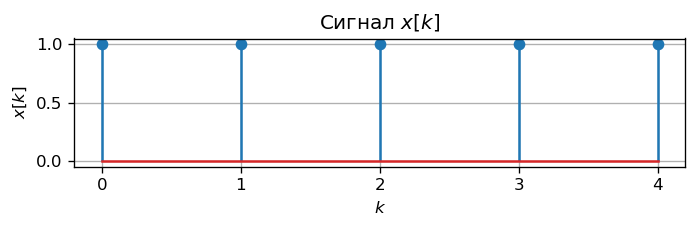

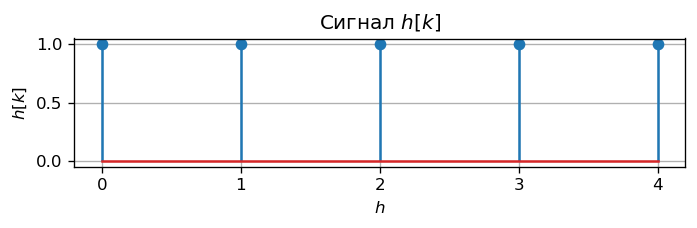

In [5]:
#Начало графического блока сигнала икс
figure1 = plt.figure(figsize=[6, 2], dpi=120)# размер полотна,число точек на дюйм
ax = plt.axes() #создание объекта график
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))# шкала по абсцисс
plt.stem(k, x)# график отсчетов
plt.xlabel("$k$")# подпись оси абсцисс
plt.ylabel("$x[k]$")# подпись оси ординат
plt.title("Сигнал $x[k]$")# заголовок
plt.grid()# сетка
plt.tight_layout() #корректировка неперекрытия
plt.show() #показать график
#Конец графического блока сигнала икс

#Начало графического блока сигнала аш
figure1 = plt.figure(figsize=[6, 2], dpi=120)# размер полотна,число точек на дюйм
ax = plt.axes() #создание объекта график
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))# шкала по абсцисс
plt.stem(k, h)# график отсчетов
plt.xlabel("$h$")# подпись оси абсцисс
plt.ylabel("$h[k]$")# подпись оси ординат
plt.title("Сигнал $h[k]$")# заголовок
plt.grid()# сетка
plt.tight_layout() #корректировка неперекрытия
plt.show() #показать график
#Конец графического блока сигнала аш

In [6]:
print("Так как последовательности каузальны,", "то пределы суммирования в свертке заменятся на:", "0 и M(5)", "для верхнего и нижнего, соответсвенно", sep = '\n')

Так как последовательности каузальны,
то пределы суммирования в свертке заменятся на:
0 и M(5)
для верхнего и нижнего, соответсвенно


In [7]:
summ = 0
buff = 0

for i in range (0 , M, 1):
    for j in range (0, i+1, 1):
        buff = x[j] * h[i - j]
        summ = summ + buff
    y[i] = summ
    summ = 0
    
for i in range (M, 2*M-2, 1):
    y[i] = y[2*M-2 - i]
y[2 * M - 2] = y[0]

print(y)

[1. 2. 3. 4. 5. 4. 3. 2. 1.]


In [8]:
y1 = signal.convolve(x, h)
y1

array([1., 2., 3., 4., 5., 4., 3., 2., 1.])

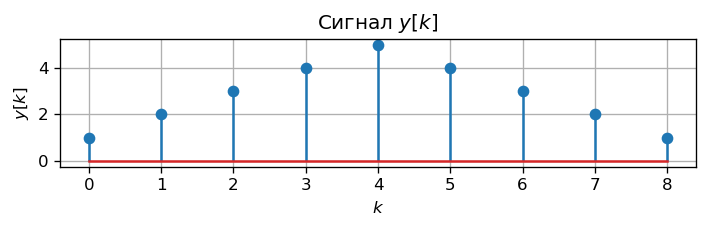

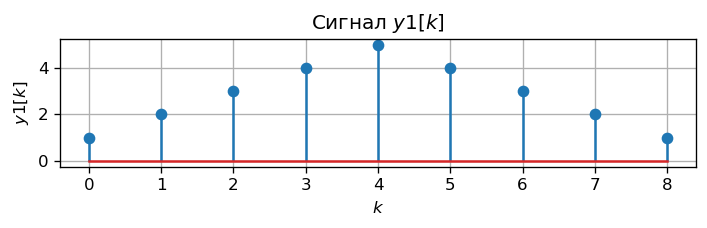

In [9]:
#Начало графического блока сигнала игрек
figure1 = plt.figure(figsize=[6, 2], dpi=120)# размер полотна,число точек на дюйм
ax = plt.axes() #создание объекта график
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))# шкала по абсцисс
plt.stem(k1, y)# график отсчетов
plt.xlabel("$k$")# подпись оси абсцисс
plt.ylabel("$y[k]$")# подпись оси ординат
plt.title("Сигнал $y[k]$")# заголовок
plt.grid()# сетка
plt.tight_layout() #корректировка неперекрытия
plt.show() #показать график
#Конец графического блока сигнала игрек

#Начало графического блока сигнала игрек1
figure1 = plt.figure(figsize=[6, 2], dpi=120)# размер полотна,число точек на дюйм
ax = plt.axes() #создание объекта график
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))# шкала по абсцисс
plt.stem(k1, y1)# график отсчетов
plt.xlabel("$k$")# подпись оси абсцисс
plt.ylabel("$y1[k]$")# подпись оси ординат
plt.title("Сигнал $y1[k]$")# заголовок
plt.grid()# сетка
plt.tight_layout() #корректировка неперекрытия
plt.show() #показать график
#Конец графического блока сигнала игрек1

In [10]:
print("И стал свет.", "И это было хорошо.", sep = '\n')

И стал свет.
И это было хорошо.


## Задача 1.2. Эффективное вычисление свертки 




| Варианты: |   $1$ |    $2$ |    $3$ |    $4$ |    $5$ |    $6$ |    $7$ |    $8$ |    $9$ |    $10$ |  
|:---------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|    $N$    | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ |
|$n_0$| $128$ | $32$ | $256$ | $64$ | $512$ | $1024$ | $230$ | $325$ | $501$ | $1000$ |

Даны последовательности отсчетов
$$ x[k]= \cos(2\pi kn_0/N)$$  
$$ h[k]= \sin(2\pi kn_0/N)$$  
где $n_0$, $N$ взять из таблицы сверху в соответствии с вариантом и $k$ пробегает значения от $0$ до $N-1.$  
Вычислить их линейную дискретную свертку c помощью `signal.convolve()` двумя способами: с помощью прямого вычисления по формуле свёртки и с использованием алгоритма БПФ.  
Сравнить вычислительную эффективность, сделать вывод. 

P.S. На вычисление свертки по формуле может потребоваться значительное колличество времени. 



In [11]:
print("День первый.", "И бесфомренный свет стал обретать сущность и форму.", sep = '\n')

День первый.
И бесфомренный свет стал обретать сущность и форму.


In [12]:
N = 2**17
n0 = 512

print("N = ",N)
print("n0 = ",n0)

N =  131072
n0 =  512


In [13]:
x = np.zeros(N)
h = np.zeros(N)
k = np.arange(x.size)

print("x = ",x)
print("h = ",h)
print("k = ",k)

x =  [0. 0. 0. ... 0. 0. 0.]
h =  [0. 0. 0. ... 0. 0. 0.]
k =  [     0      1      2 ... 131069 131070 131071]


In [14]:
for i in range (0, N-1, 1):
    x[i] = np.cos(2*np.pi*n0*i/N)
    h[i] = np.sin(2*np.pi*n0*i/N)

print("x = ",x)
print("h = ",h)

x =  [1.         0.99969882 0.99879546 ... 0.99729046 0.99879546 0.        ]
h =  [ 0.          0.02454123  0.04906767 ... -0.07356456 -0.04906767
  0.        ]


In [15]:
start=time.time()

y = signal.convolve(x, h)

finish=time.time()
tempus = finish-start

print("y = ",y)

print("Время вычислений =  ", finish-start, "c")

y =  [-5.35764028e-13  2.45412285e-02  7.36015115e-02 ... -4.90085702e-02
 -4.54747351e-13 -6.82121026e-13]
Время вычислений =   0.019709348678588867 c


In [16]:
M = x.size + h.size -1
M

262143

In [17]:
X = np.fft.fft(x, M)
H = np.fft.fft(x, M)

print("X = ",X)
print("H = ",H)

X =  [-0.99969882+0.00000000e+00j  1.9996993 +7.95878344e-02j
 -0.99970073-1.19770296e-05j ...  1.99970311-2.38765325e-01j
 -0.99970073+1.19770297e-05j  1.9996993 -7.95878344e-02j]
H =  [-0.99969882+0.00000000e+00j  1.9996993 +7.95878344e-02j
 -0.99970073-1.19770296e-05j ...  1.99970311-2.38765325e-01j
 -0.99970073+1.19770297e-05j  1.9996993 -7.95878344e-02j]


In [18]:
start = time.time()

Y = X * H
y = np.fft.ifft(Y, N)

finish = time.time()
tempus_one = finish - start

print("свертка = ",y)

print("Время вычислений =  ", tempus_one, "c")

свертка =  [ 9.99999998e-01-3.72106039j  2.99697328e+00-5.93331479j
  4.98191161e+00-7.35849217j ...  3.96751103e+00+5.42487685j
  1.99215994e+00+3.67237035j -1.46925959e-06+0.61986791j]
Время вычислений =   0.005263328552246094 c


In [19]:
if tempus > tempus_one:
    print("Вычисление по функции свертки оптимальнее по времени")
elif tempus < tempus_one:
    print("Вычисление свертки через БПФ оптимальнее по времени")
else:
    print("Оба метода одиковы по затраченному времени")

Вычисление по функции свертки оптимальнее по времени


In [20]:
print("День второй.", "И родился наш мир.", "Нащ хрупкий,прекрасный дом.", "Сильный согревающий свет лееял эти дни.", "И светило меньшее правило ночью.", "И был вечер,и было утро.", sep = '\n')

День второй.
И родился наш мир.
Нащ хрупкий,прекрасный дом.
Сильный согревающий свет лееял эти дни.
И светило меньшее правило ночью.
И был вечер,и было утро.


# Модуль 2. Характеристики LTI систем.






## Задача 2.1. Фильтр скользящего среднего

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|$M_1$|  9 | 14 | 13 |  9 | 12 |  11 | 14 | 13 |  9 | 12 |
|$M_2$| 29 | 50 | 40 | 24 | 50 |  45 | 50 | 40 | 24 | 50 |
| $K$ | 35 | 63 | 57 | 35 | 63 |  55 | 63 | 57 | 35 | 63 |
| $N$ |100 |140 |130 |100 |140 | 115 |140 | 130 | 100 | 140 |

Рассмотрите фильтр скользящего среднего

$$y[k]=\dfrac{1}{M}\sum_{m=0}^{M-1} x[k-m]$$

для $M = M_1$ и $M = M_2$ (из таблицы): 

* Определите и изобразите импульсную характеристику $h[k]$ фильтра.

* Вычислите с помощью `signal.convolve` отклик $y[k]$ фильтра на входное воздействие вида
$$ x_{noise}[k] = \sin(2\pi k / K) + \varepsilon[k], 0\le k\le N-1.$$
где $K,\;N$ — соответствующие числа из таблицы, $\varepsilon[k]$ — белый гаусовский шум (`np.random.normal(mu, sigma, N)`) с нулевым среднем `mu=0` и  среднеквадратическим отклонением $\sigma=0.1$ (`sigma=0.1`).  
* Сравните сигналы $x_{noise}[k]$, $y[k]$ и 
$$ x[k] = \sin(2\pi k / K), 0\le k\le N-1.$$
* Определите и изобразите амплитудно-частотную характеристику (АЧХ) $|H(\nu)|$ фильтра. Как выбор $M$ влияет на результат фильтрации отрезка гармонического сигнала?

In [21]:
print("Ещё день.", "И собрались воды мировые вместе.", "И возникла суша среди них.", sep = '\n')

Ещё день.
И собрались воды мировые вместе.
И возникла суша среди них.


In [22]:
M1 = 12
M2 = 50
K = 63
N = 140

In [23]:
h1 = np.ones(M1)/M1
h2 = np.ones(M2)/M2
k1 = np.arange(h1.size)
k2 = np.arange(h2.size)

print(h1)
print(h2)
print(k1)
print(k2)

[0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333]
[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


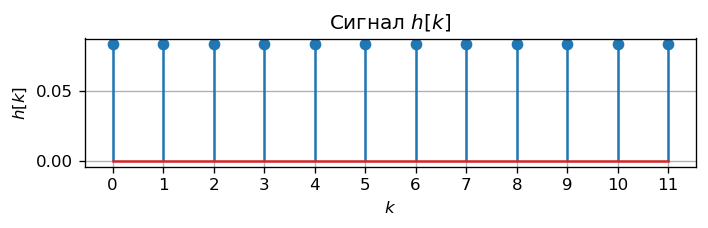

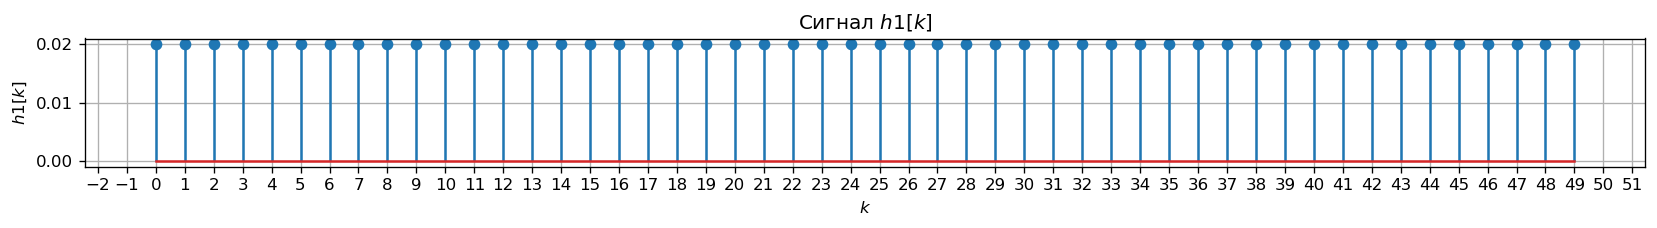

In [24]:
#Начало графического блока сигнала аш1
figure1 = plt.figure(figsize=[6, 2], dpi=120)# размер полотна,число точек на дюйм
ax = plt.axes() #создание объекта график
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))# шкала по абсцисс
plt.stem(k1, h1)# график отсчетов
plt.xlabel("$k$")# подпись оси абсцисс
plt.ylabel("$h[k]$")# подпись оси ординат
plt.title("Сигнал $h[k]$")# заголовок
plt.grid()# сетка
plt.tight_layout() #корректировка неперекрытия
plt.show() #показать график
#Конец графического блока сигнала аш1

#Начало графического блока сигнала аш2
figure1 = plt.figure(figsize=[14, 2], dpi=120)# размер полотна,число точек на дюйм
ax = plt.axes() #создание объекта график
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))# шкала по абсцисс
plt.stem(k2, h2)# график отсчетов
plt.xlabel("$k$")# подпись оси абсцисс
plt.ylabel("$h1[k]$")# подпись оси ординат
plt.title("Сигнал $h1[k]$")# заголовок
plt.grid()# сетка
plt.tight_layout() #корректировка неперекрытия
plt.show() #показать график
#Конец графического блока сигнала аш2

In [25]:
#Вычисление модуля ДВПФ для сигнала по функции
def dtft(varyable, M=1024):
    return -0.5 + np.arange(M)/M, np.fft.fftshift(np.fft.fft(varyable, M)) #описание функции ДВПФ

In [26]:
K1, H1 = dtft(h1, M=1024)
print(H1)
K2, H2 = dtft(h2, M=1024)
print(H2)

[0.        +0.j         0.00010349+0.00306554j 0.00041346+0.00611654j ...
 0.00092838-0.00913854j 0.00041346-0.00611654j 0.00010349-0.00306554j]
[0.        +0.j         0.00045767+0.00302149j 0.00178882+0.00576927j ...
 0.00387164-0.00799468j 0.00178882-0.00576927j 0.00045767-0.00302149j]


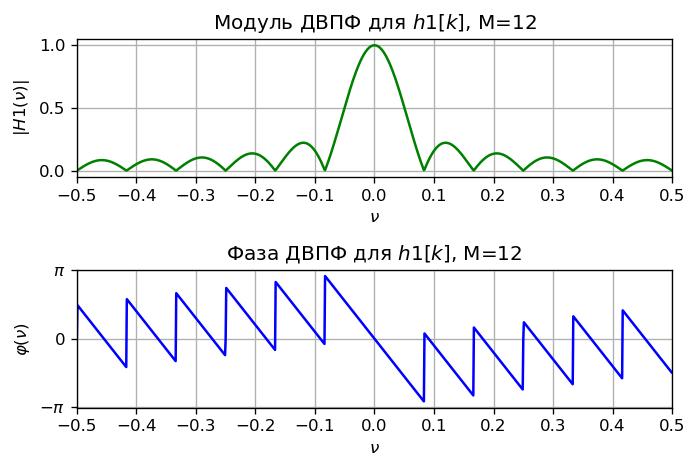

In [27]:
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(K1, abs(H1), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|H1(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title(r'Модуль ДВПФ для $h1[k]$, M={}'.format(M1))
plt.grid()
ax2 = plt.subplot(2, 1, 2)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(K1, np.angle(H1), 'b')
plt.xlabel("$\\nu$")
plt.ylabel("$\\varphi(\\nu)$")
plt.yticks([-np.pi, 0, np.pi], labels=("$-\\pi$", "0", "$\\pi$"))
plt.xlim([-0.5, 0.5])
plt.title(r'Фаза ДВПФ для $h1[k]$, M={}'.format(M1))
plt.grid()
plt.tight_layout()
plt.show()

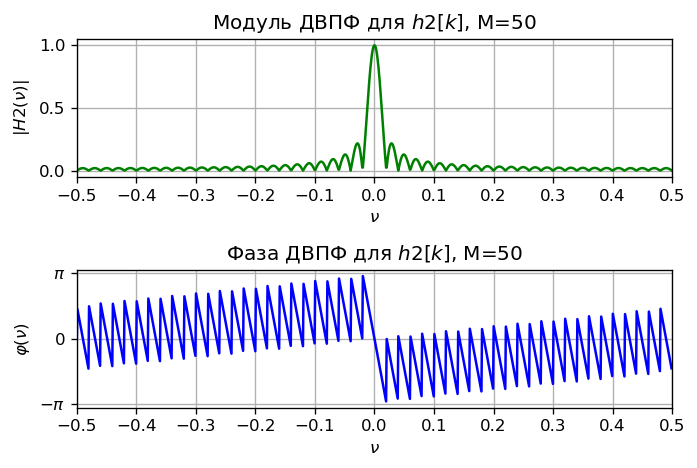

In [28]:
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(K2, abs(H2), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|H2(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title(r'Модуль ДВПФ для $h2[k]$, M={}'.format(M2))
plt.grid()
ax2 = plt.subplot(2, 1, 2)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(K2, np.angle(H2), 'b')
plt.xlabel("$\\nu$")
plt.ylabel("$\\varphi(\\nu)$")
plt.yticks([-np.pi, 0, np.pi], labels=("$-\\pi$", "0", "$\\pi$"))
plt.xlim([-0.5, 0.5])
plt.title(r'Фаза ДВПФ для $h2[k]$, M={}'.format(M2))
plt.grid()
plt.tight_layout()
plt.show()

In [29]:
e = np.random.normal(0, 0.1, N)
k = np.arange(e.size)
print(e)
print(k)

[ 0.0681823   0.06034617  0.02151138 -0.01719671  0.04330775 -0.10045558
 -0.19953705  0.03430954  0.02648368 -0.02756406 -0.0346947  -0.0299247
  0.11643035 -0.0679912  -0.07239175 -0.09923375  0.01673534 -0.03595813
  0.19535615  0.00448419 -0.17305131  0.10939666 -0.00443705 -0.07183894
 -0.0569385  -0.22594305 -0.04935872 -0.19997286 -0.09258122 -0.03170594
 -0.10898459  0.08382542  0.0782213   0.15283725  0.00346544 -0.10291064
 -0.1341358   0.0526533   0.09151406 -0.13777672  0.21798542  0.02034442
  0.05488518 -0.06303011  0.04968628 -0.11703648 -0.03040992  0.06042829
  0.26213147  0.00740997 -0.08080641 -0.02707344  0.13081012  0.00247544
 -0.1268719   0.01759574 -0.13641757 -0.12178138 -0.03695193  0.00798279
  0.05927276 -0.05496501  0.10983068 -0.00425764 -0.01685508 -0.0202108
 -0.02656851 -0.01295726 -0.01528676  0.01526925 -0.11705119 -0.13173933
 -0.00730716  0.046775   -0.06719561 -0.0810424   0.11929144  0.04847927
 -0.01088612 -0.09908791 -0.14518101  0.00118991  0.0

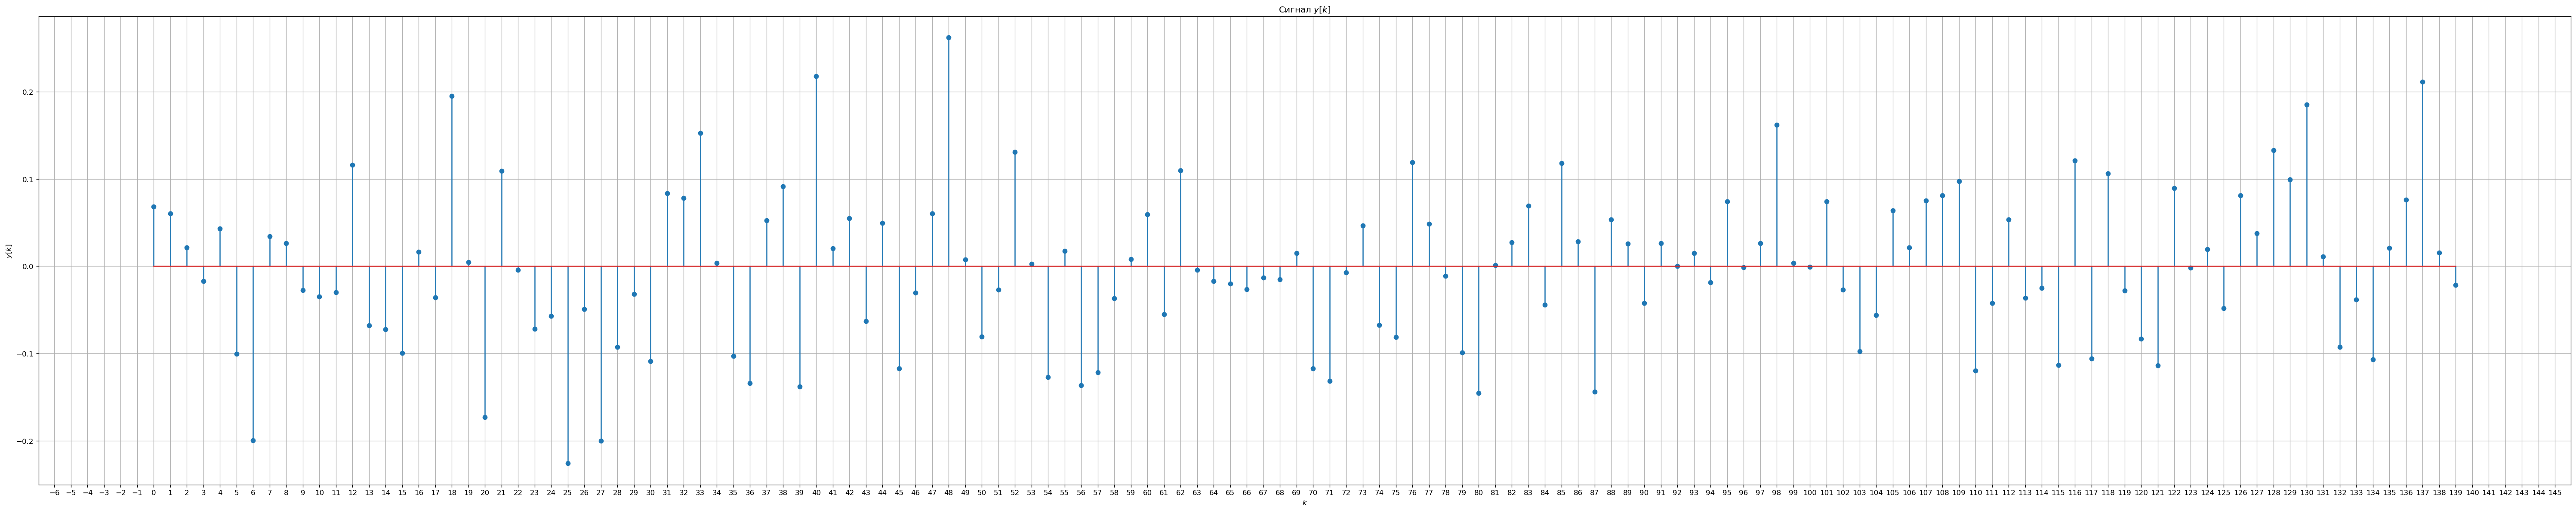

In [30]:
#Начало графического блока сигнала гаусова шума
figure1 = plt.figure(figsize=[50, 10], dpi=120)# размер полотна,число точек на дюйм
ax = plt.axes() #создание объекта график
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))# шкала по абсцисс
plt.stem(k, e)# график отсчетов
plt.xlabel("$k$")# подпись оси абсцисс
plt.ylabel("$y[k]$")# подпись оси ординат
plt.title("Сигнал $y[k]$")# заголовок
plt.grid()# сетка
plt.tight_layout() #корректировка неперекрытия
plt.show() #показать график
#Конец графического блока сигнала гаусова шума

In [31]:
x_noise = np.zeros(N)
x_noise

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [32]:
for i in range (0, N, 1):
    x_noise[i] = np.sin(2*np.pi*i/K) + e[i]
k_x = np.arange(x_noise.size)

print("x очарованный = ", x_noise)
print("k очарованный = ", k_x)

x очарованный =  [ 0.0681823   0.15991402  0.21965753  0.27755846  0.43174254  0.3777984
  0.36378301  0.67709715  0.74235053  0.75426742  0.80533122  0.85994711
  1.0473041   0.89463305  0.912416    0.89797004  1.01642452  0.95628108
  1.17028406  0.95241154  0.73845454  0.97542207  0.80750096  0.67794226
  0.62323423  0.37786136  0.47207648  0.23391088  0.24943892  0.21505145
  0.04005768  0.1336713   0.02837541  0.00379499 -0.24329196 -0.44493078
 -0.56801954 -0.46878191 -0.51229035 -0.81794945 -0.53179578 -0.79159358
 -0.81114022 -0.97453597 -0.89824107 -1.09196439 -1.02264912 -0.93926089
 -0.73507233 -0.97739778 -1.04343066 -0.95794719 -0.75906169 -0.83755048
 -0.90870338 -0.69827111 -0.77920518 -0.68510144 -0.51520591 -0.38045201
 -0.23548241 -0.25311115  0.01026283 -0.00425764  0.08271277  0.17793534
  0.26818666  0.37547753  0.46296722  0.57858931  0.52573642  0.58412752
  0.77452432  0.88680093  0.8226762   0.84983135  1.08191568  1.03328702
  0.98631768  0.90060127  0.8470582

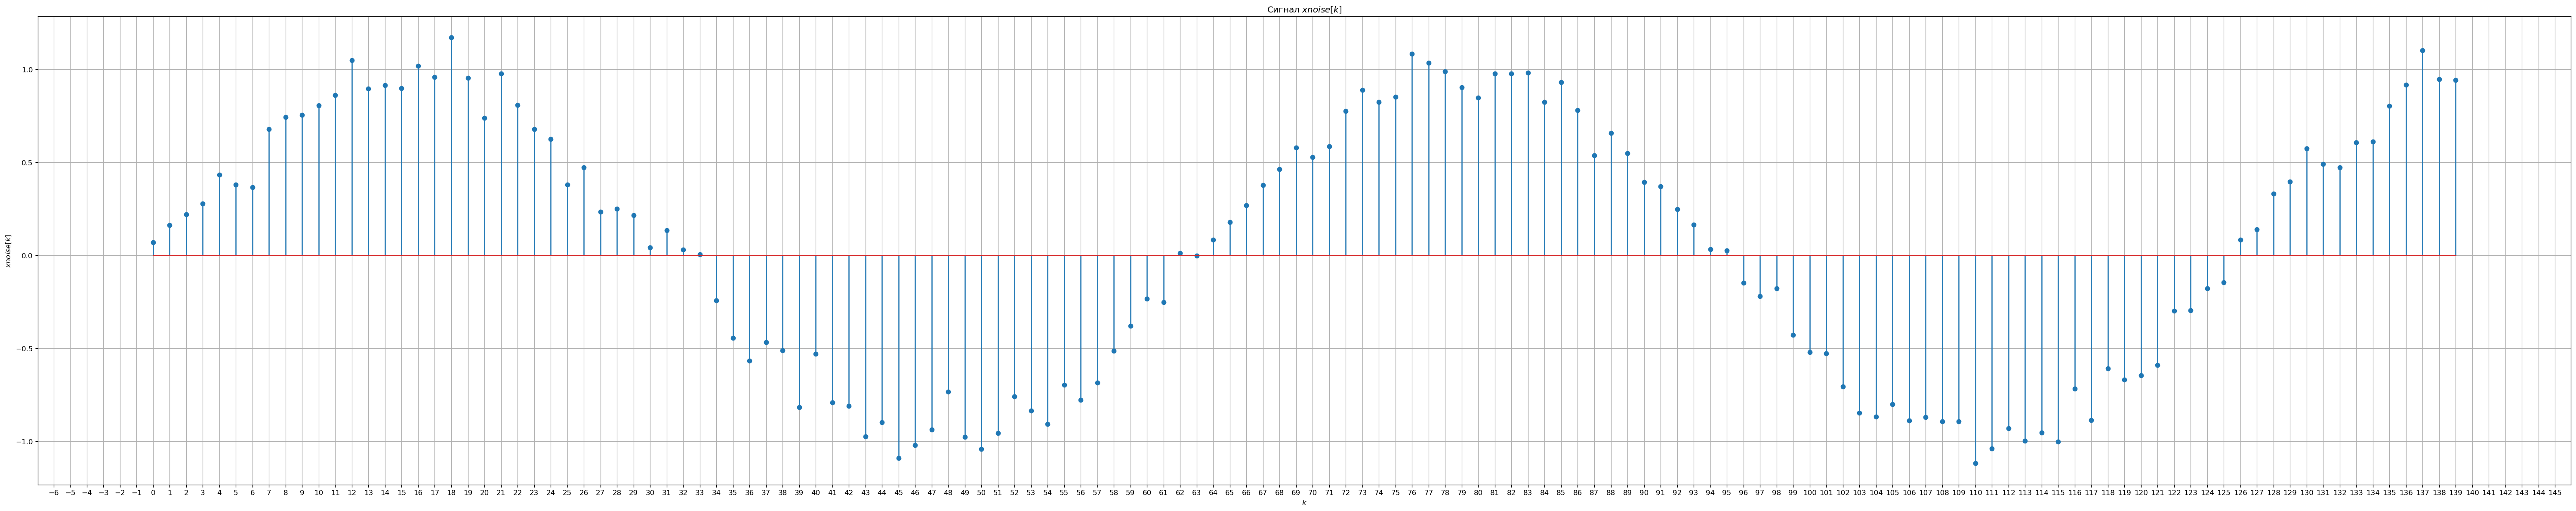

In [33]:
#Начало графического блока сигнала икс очарованного
figure1 = plt.figure(figsize=[50, 10], dpi=120)# размер полотна,число точек на дюйм
ax = plt.axes() #создание объекта график
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))# шкала по абсцисс
plt.stem(k_x, x_noise)# график отсчетов
plt.xlabel("$k$")# подпись оси абсцисс
plt.ylabel("$x noise[k]$")# подпись оси ординат
plt.title("Сигнал $x noise[k]$")# заголовок
plt.grid()# сетка
plt.tight_layout() #корректировка неперекрытия
plt.show() #показать график
#Конец графического блока сигнала икс очарованного

In [34]:
x = np.zeros(N)
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [35]:
for i in range (0, N, 1):
    x[i] = np.sin(2*np.pi*i/K)
k = np.arange(x_noise.size)

print("x очарованный = ", x)
print("k очарованный = ", k)

x очарованный =  [ 0.00000000e+00  9.95678466e-02  1.98146143e-01  2.94755174e-01
  3.88434796e-01  4.78253979e-01  5.63320058e-01  6.42787610e-01
  7.15866849e-01  7.81831482e-01  8.40025923e-01  8.89871809e-01
  9.30873749e-01  9.62624247e-01  9.84807753e-01  9.97203797e-01
  9.99689182e-01  9.92239207e-01  9.74927912e-01  9.47927346e-01
  9.11505852e-01  8.66025404e-01  8.11938006e-01  7.49781203e-01
  6.80172738e-01  6.03804410e-01  5.21435203e-01  4.33883739e-01
  3.42020143e-01  2.46757398e-01  1.49042266e-01  4.98458857e-02
 -4.98458857e-02 -1.49042266e-01 -2.46757398e-01 -3.42020143e-01
 -4.33883739e-01 -5.21435203e-01 -6.03804410e-01 -6.80172738e-01
 -7.49781203e-01 -8.11938006e-01 -8.66025404e-01 -9.11505852e-01
 -9.47927346e-01 -9.74927912e-01 -9.92239207e-01 -9.99689182e-01
 -9.97203797e-01 -9.84807753e-01 -9.62624247e-01 -9.30873749e-01
 -8.89871809e-01 -8.40025923e-01 -7.81831482e-01 -7.15866849e-01
 -6.42787610e-01 -5.63320058e-01 -4.78253979e-01 -3.88434796e-01
 -2.9475

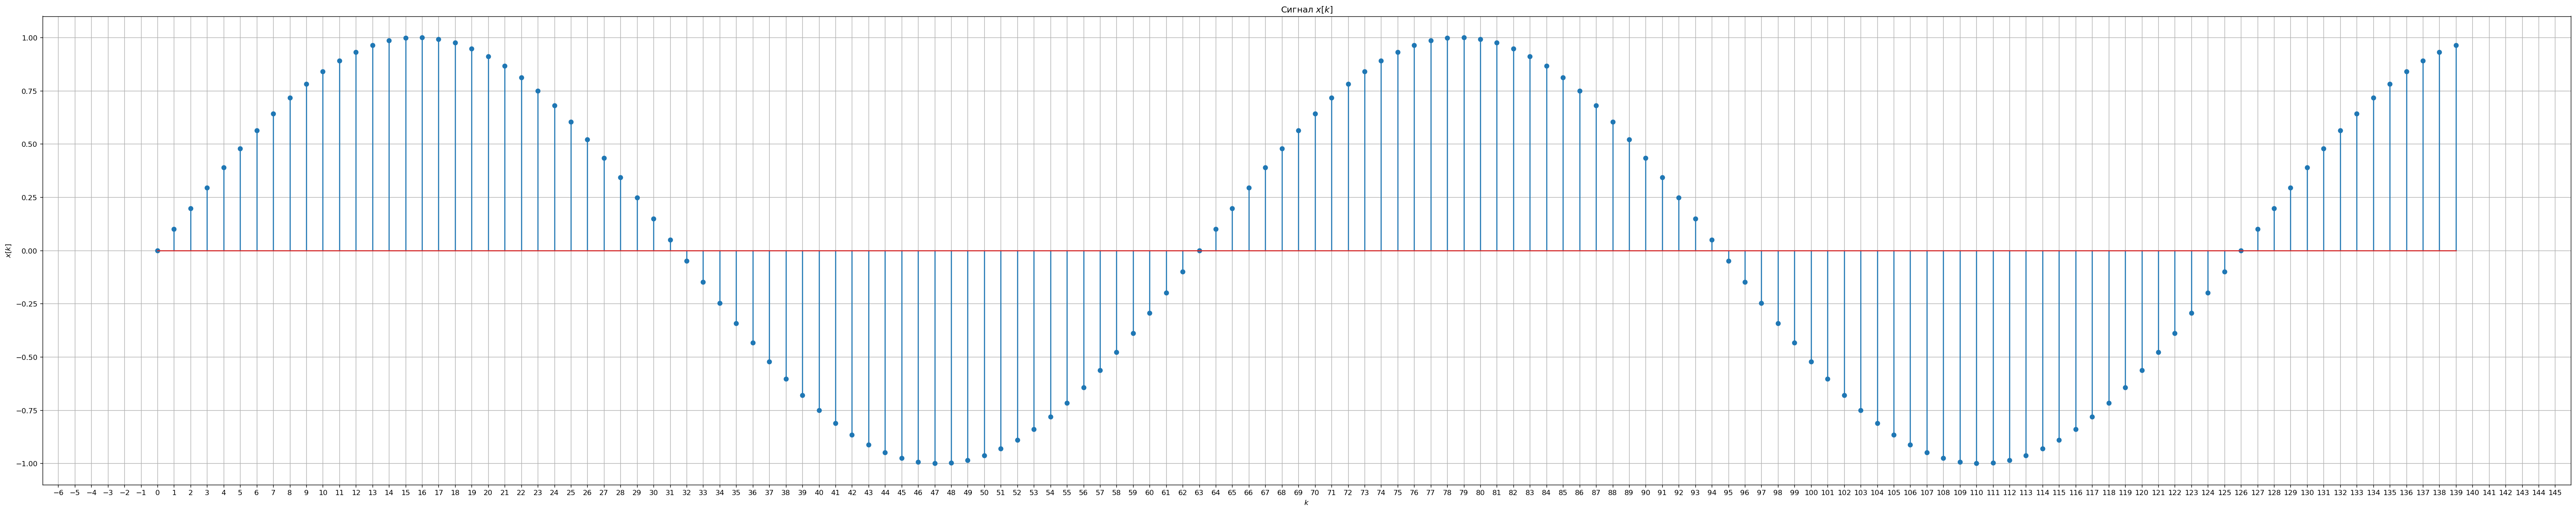

In [36]:
#Начало графического блока сигнала икс 
figure1 = plt.figure(figsize=[50, 10], dpi=120)# размер полотна,число точек на дюйм
ax = plt.axes() #создание объекта график
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))# шкала по абсцисс
plt.stem(k, x)# график отсчетов
plt.xlabel("$k$")# подпись оси абсцисс
plt.ylabel("$x[k]$")# подпись оси ординат
plt.title("Сигнал $x[k]$")# заголовок
plt.grid()# сетка
plt.tight_layout() #корректировка неперекрытия
plt.show() #показать график
#Конец графического блока сигнала икс 

In [37]:
y11 = signal.convolve(x_noise, h1)
k_y11 = np.arange(y11.size)
y12 = signal.convolve(x_noise, h2)
k_y12 = np.arange(y12.size)

y21 = signal.convolve(x, h1)
k_y21 = np.arange(y21.size)
y22 = signal.convolve(x, h2)
k_y22 = np.arange(y22.size)

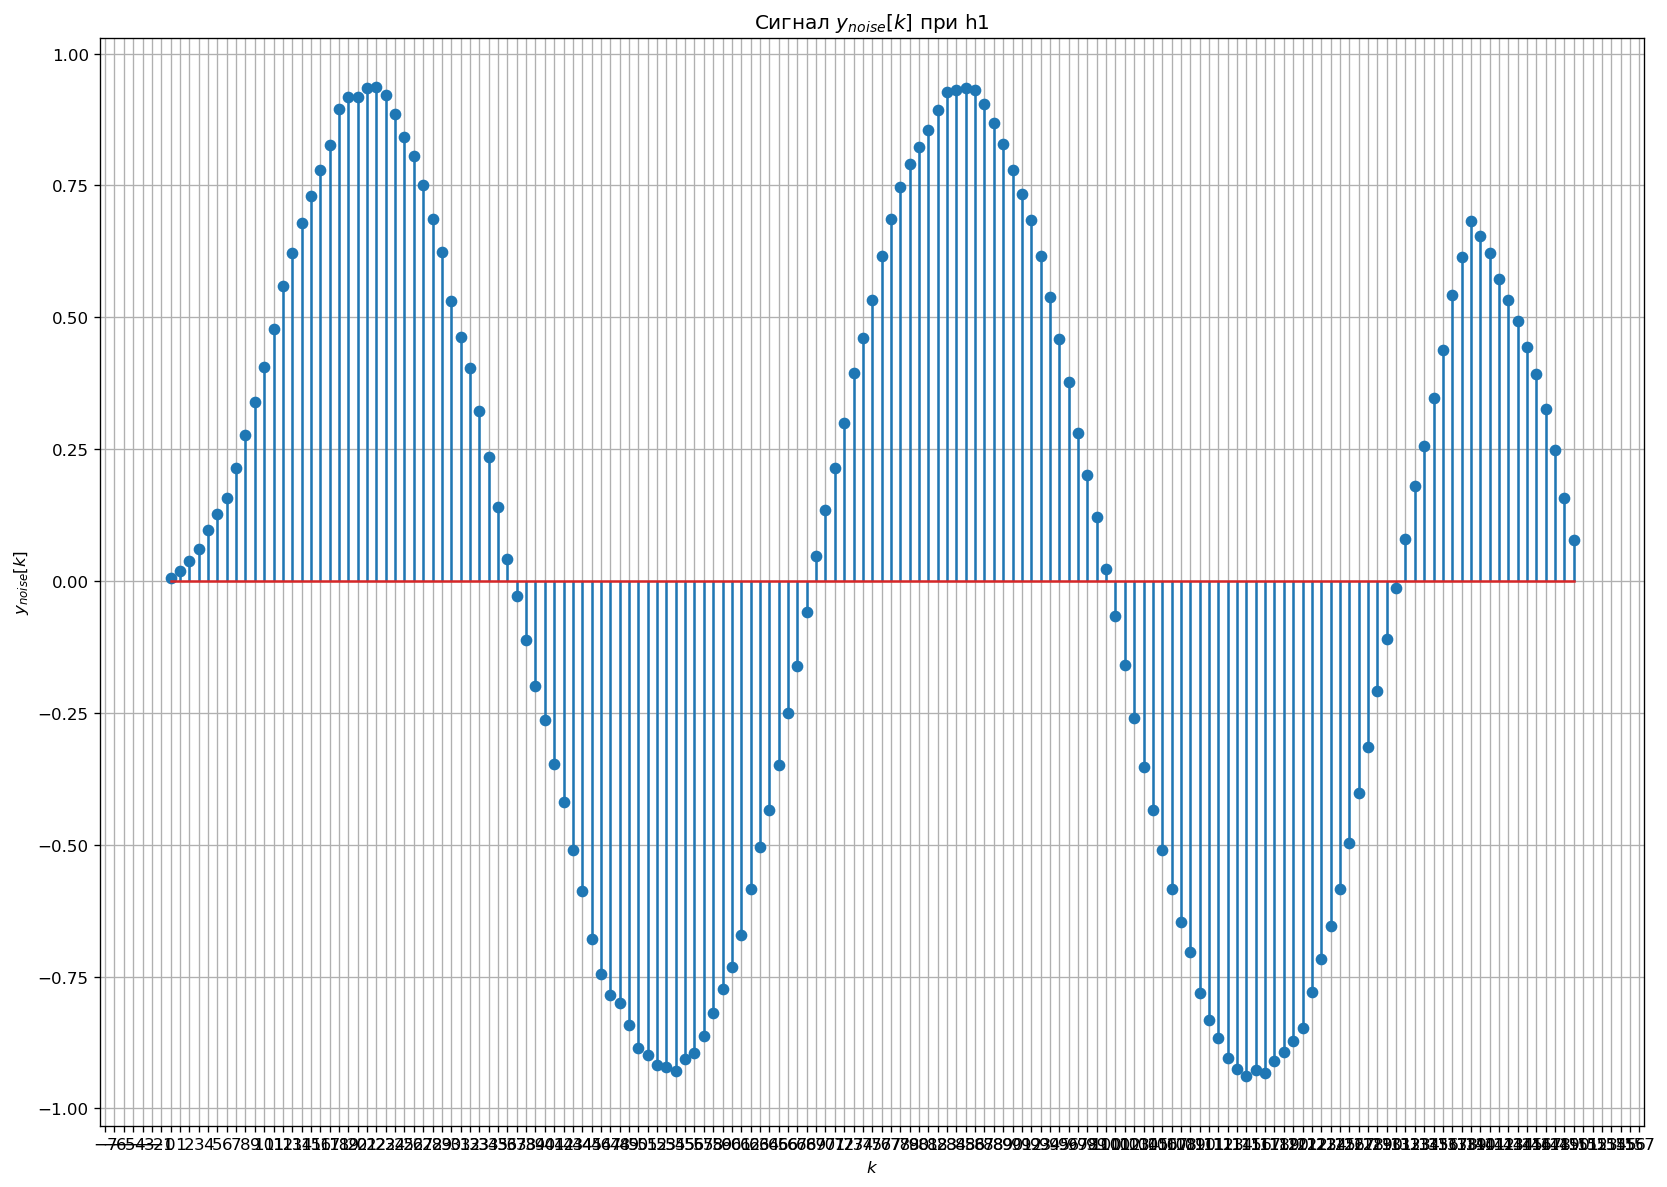

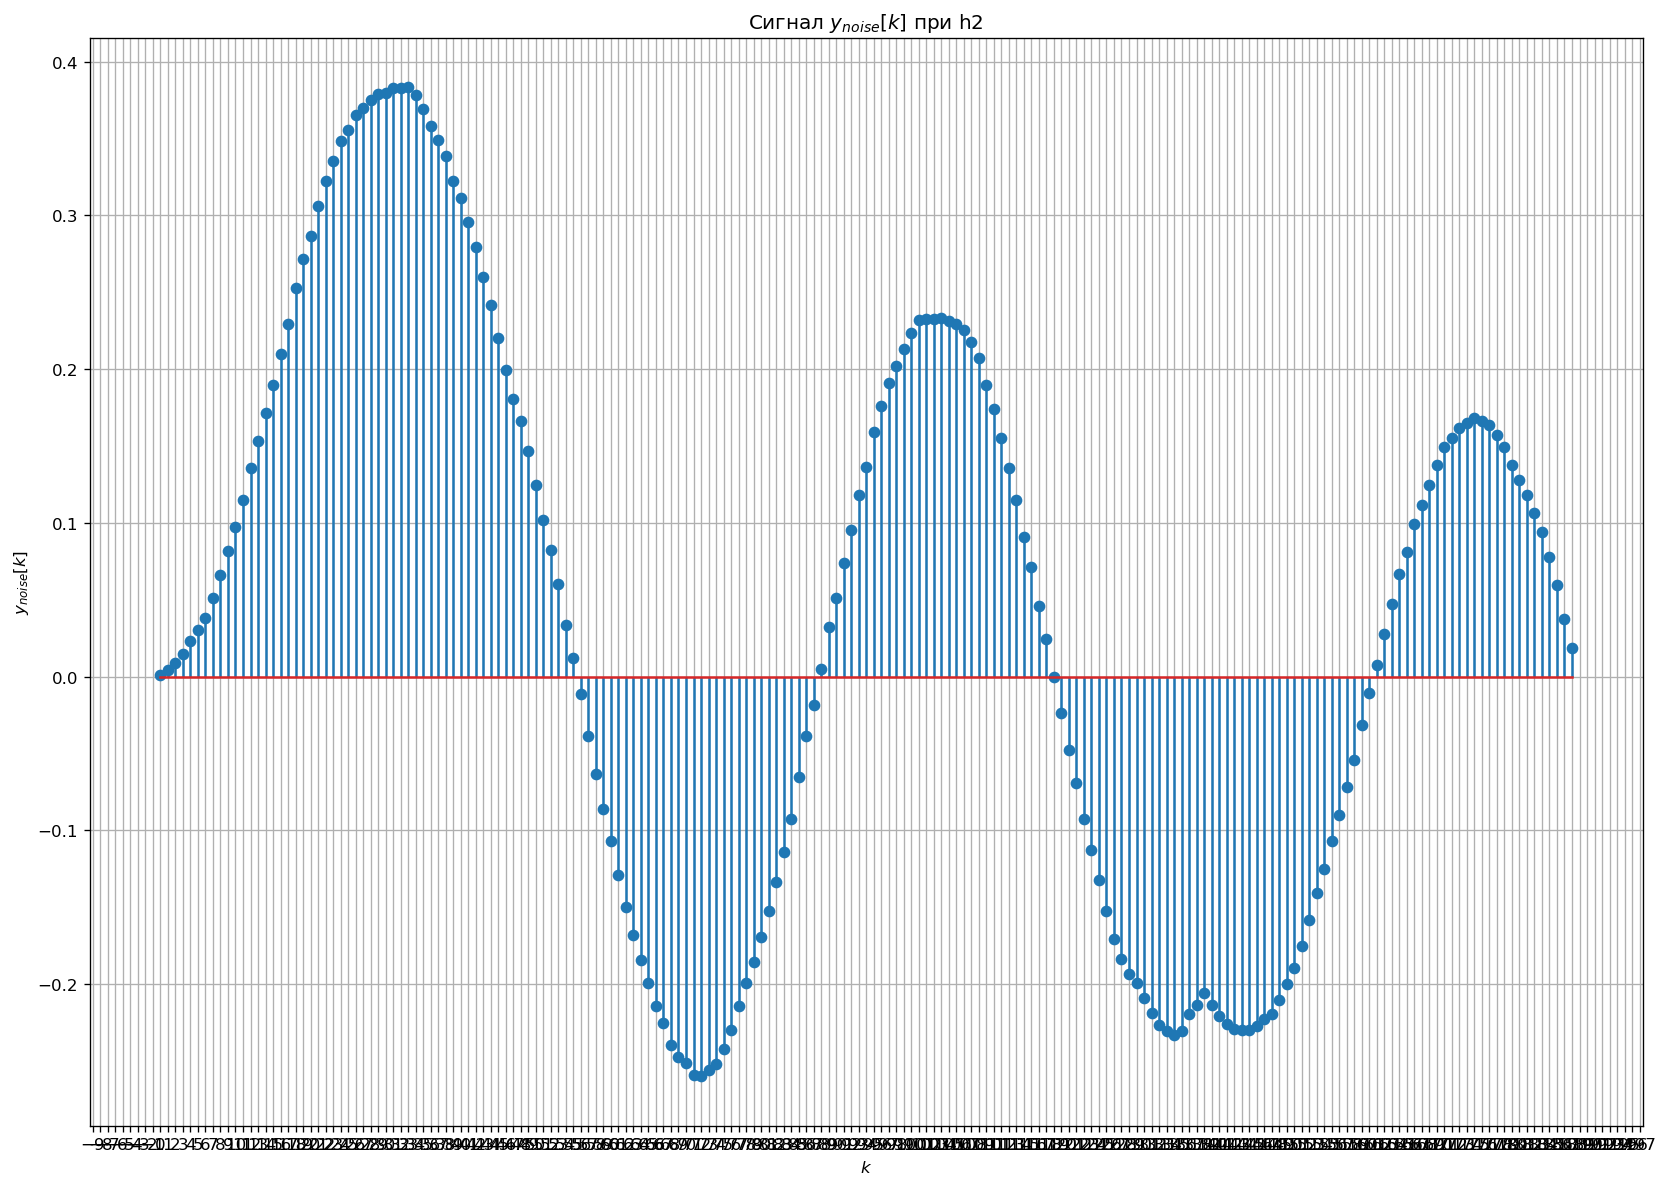

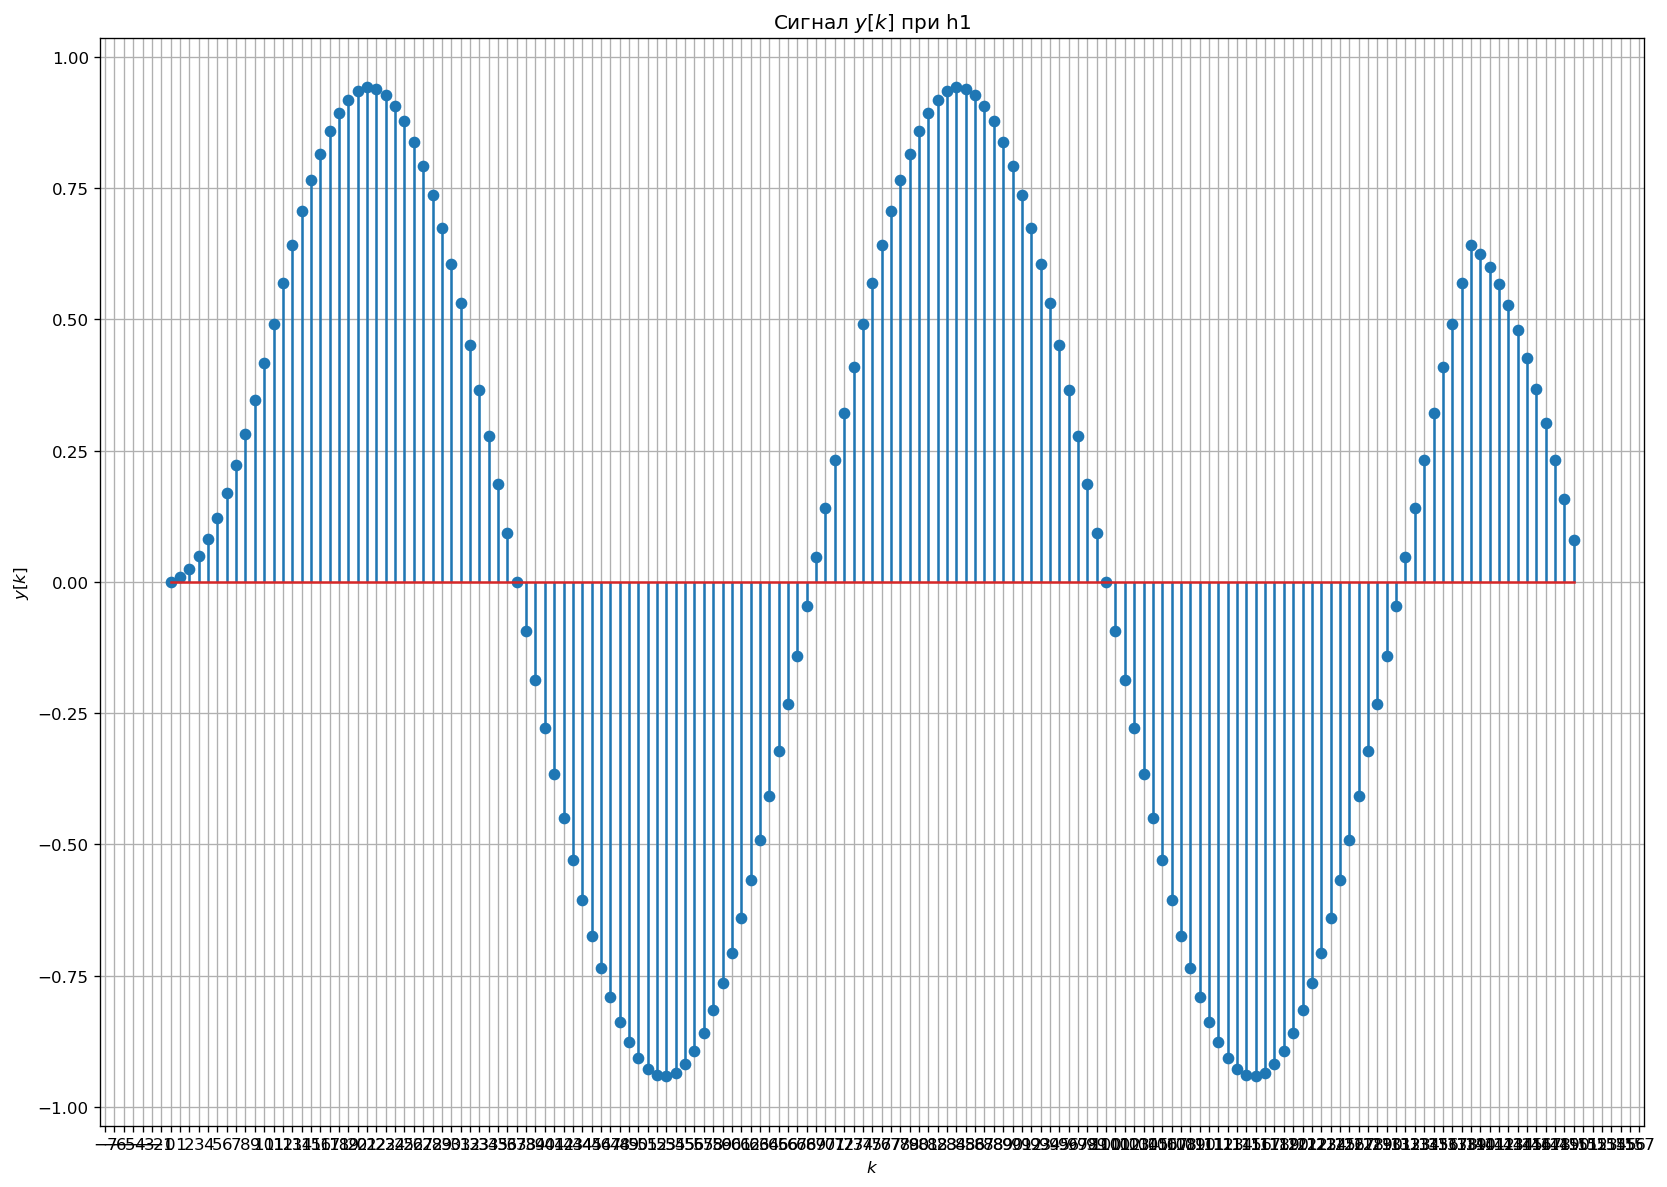

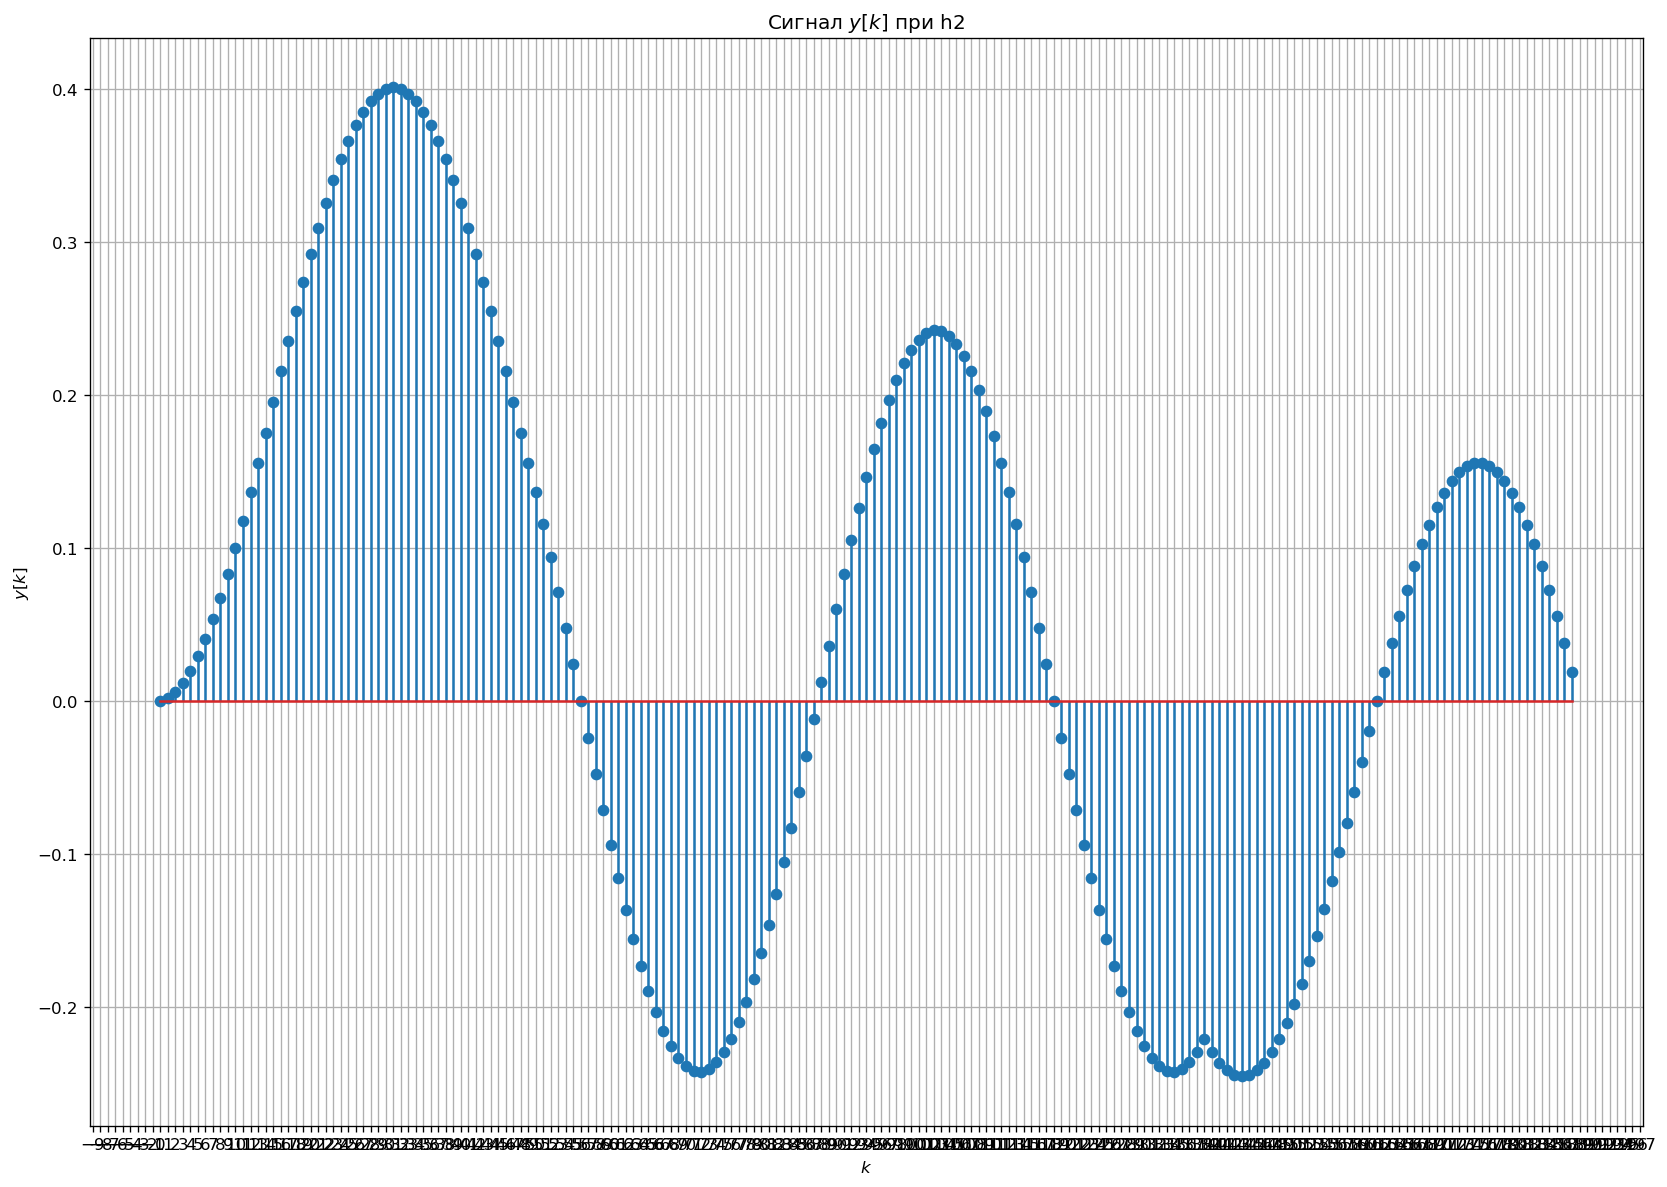

In [38]:
#Начало графического блока сигнала
figure1 = plt.figure(figsize=[14, 10], dpi=120)# размер полотна,число точек на дюйм
ax = plt.axes() #создание объекта график
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))# шкала по абсцисс
plt.stem(k_y11, y11)# график отсчетов
plt.xlabel("$k$")# подпись оси абсцисс
plt.ylabel("$y_{noise}[k]$")# подпись оси ординат
plt.title(r"Сигнал $y_{noise}[k]$ при h1")# заголовок
plt.grid()# сетка
plt.tight_layout() #корректировка неперекрытия
plt.show() #показать график
#Конец графического блока сигнала

#Начало графического блока сигнала
figure1 = plt.figure(figsize=[14, 10], dpi=120)# размер полотна,число точек на дюйм
ax = plt.axes() #создание объекта график
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))# шкала по абсцисс
plt.stem(k_y12, y12)# график отсчетов
plt.xlabel("$k$")# подпись оси абсцисс
plt.ylabel("$y_{noise}[k]$")# подпись оси ординат
plt.title(r"Сигнал $y_{noise}[k]$ при h2")# заголовок
plt.grid()# сетка
plt.tight_layout() #корректировка неперекрытия
plt.show() #показать график
#Конец графического блока сигнала

#Начало графического блока сигнала
figure1 = plt.figure(figsize=[14, 10], dpi=120)# размер полотна,число точек на дюйм
ax = plt.axes() #создание объекта график
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))# шкала по абсцисс
plt.stem(k_y21, y21)# график отсчетов
plt.xlabel("$k$")# подпись оси абсцисс
plt.ylabel("$y[k]$")# подпись оси ординат
plt.title(r"Сигнал $y[k]$ при h1")# заголовок
plt.grid()# сетка
plt.tight_layout() #корректировка неперекрытия
plt.show() #показать график
#Конец графического блока сигнала

#Начало графического блока сигнала
figure1 = plt.figure(figsize=[14, 10], dpi=120)# размер полотна,число точек на дюйм
ax = plt.axes() #создание объекта график
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))# шкала по абсцисс
plt.stem(k_y22, y22)# график отсчетов
plt.xlabel("$k$")# подпись оси абсцисс
plt.ylabel("$y[k]$")# подпись оси ординат
plt.title(r"Сигнал $y[k]$ при h2")# заголовок
plt.grid()# сетка
plt.tight_layout() #корректировка неперекрытия
plt.show() #показать график
#Конец графического блока сигнала

In [39]:
print("Прошел другой день.", "И на земле понемногу зародилась жизнь.", "Густым зеленым ковром укрыл Он свое творение.", sep = '\n')

Прошел другой день.
И на земле понемногу зародилась жизнь.
Густым зеленым ковром укрыл Он свое творение.


## Задача 2.2. Двухкаскадный фильтр

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |   7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
| $a$ |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |
| $b$ |0.8 |0.7 |0.6 |0.8 |0.7 |0.6 |0.6 |0.8 |0.7 |0.6 |
| $c$ |0.5 |0.4 |0.3 |0.5 |0.3 |0.4 |0.3 |0.5 |0.3 |0.4 |
| $M$ | 50 | 60 | 50 | 50 | 50 | 60 | 50 | 50 | 50 | 60 |
| $N$ |180 |200 |220 |180 |200 |220 |220 |180 |200 |220 |

Рассмотрите двухкаскадный фильтр, каскады которого задаются следующими разностными уравнениями. 

1) $$y[k]=\dfrac{ax[k]+bx[k-M]+cx[k-2M]}{a+b+c}$$

где $a$, $b$, $c$ и $M$ заданы в таблице с вариантами.

2) $$y[k]=\dfrac{x[k]+x[k-1]}{2}.$$

Подайте на вход такого  фильтра любой сгенерированный сигнал $x[k]$ длительностью $N$ отсчетов. Измениться ли выход системы от перестановки порядка каскадов? Проведите моделирование с использованием функции `signal.convolve`

In [40]:
print("И в воде тоже закипела жизнь.", "В глубине зародились создания, которых больше не встретишь.", "Бесчисленное множество рыб,которые до сих пор плавают в глубинах.", sep = '\n')

И в воде тоже закипела жизнь.
В глубине зародились создания, которых больше не встретишь.
Бесчисленное множество рыб,которые до сих пор плавают в глубинах.


In [41]:
a = 1
b = 0.7
c = 0.3
M = 50
N = 200

In [42]:
#x = np.ones(N)
x = np.random.normal(0, 0.1, N)
k = np.arange(x.size)

print(x)
print(k)

[-0.1822742   0.04424968  0.1244184   0.09803648  0.12334413 -0.11271648
 -0.09802653  0.10291273  0.03247369 -0.13026665  0.03508376  0.11403497
  0.04502617  0.04130903  0.1942087   0.02197465  0.07176687  0.11101587
 -0.00376646  0.01961364 -0.00636019 -0.14354314 -0.00487535 -0.05342737
 -0.19455092  0.00382697  0.11489646 -0.01633484  0.06395045 -0.04320237
  0.03621353  0.23571875 -0.07700814  0.09012924  0.06706763  0.02993809
 -0.01739974 -0.03869806  0.07831952 -0.05011346 -0.05725596  0.12532948
  0.01918261 -0.14394996  0.28419189 -0.02176342  0.08312141  0.19394673
 -0.05517882  0.10177669  0.0449516  -0.04673251  0.00804015  0.09098602
  0.03076473  0.08087923 -0.15081328 -0.1630836  -0.03231891 -0.05773802
 -0.00724619  0.0298504   0.03172558  0.00287063 -0.08561437 -0.15676736
  0.10331545 -0.03836982 -0.00035094 -0.08992826  0.12546682  0.04439312
 -0.08067941  0.07095205 -0.04604243  0.14997001  0.01610967  0.02775893
  0.0883364  -0.05201734  0.03768132 -0.14202832 -0

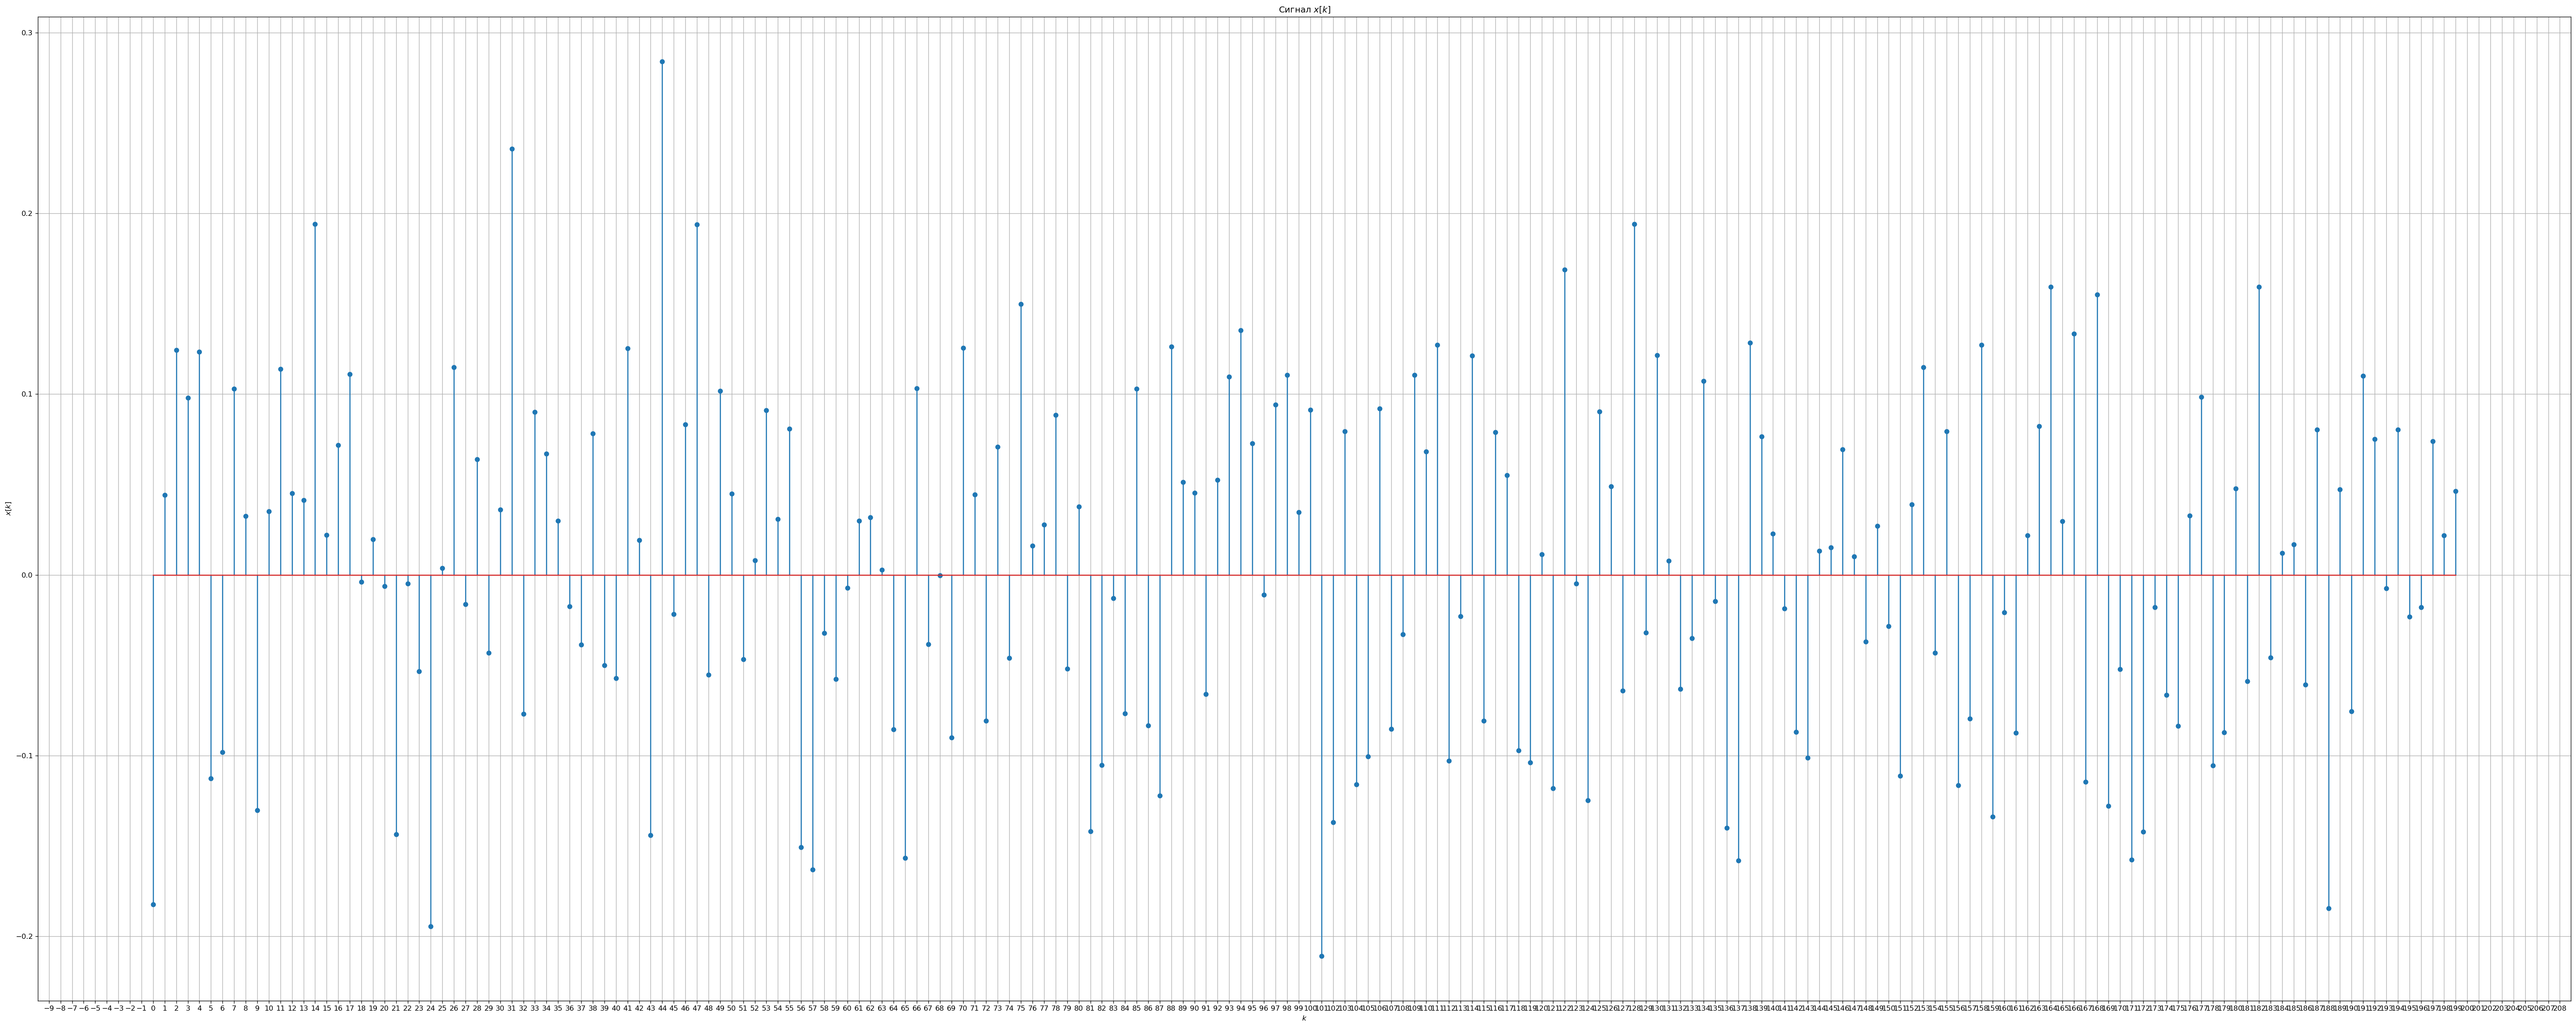

In [43]:
#Начало графического блока сигнала 
figure1 = plt.figure(figsize=[50, 20], dpi=120)# размер полотна,число точек на дюйм
ax = plt.axes() #создание объекта график
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))# шкала по абсцисс
plt.stem(k, x)# график отсчетов
plt.xlabel("$k$")# подпись оси абсцисс
plt.ylabel("$x[k]$")# подпись оси ординат
plt.title("Сигнал $x[k]$")# заголовок
plt.grid()# сетка
plt.tight_layout() #корректировка неперекрытия
plt.show() #показать график
#Конец графического блока сигнала 

In [44]:
y_one = np.zeros(N)
print(y_one)
y_two = np.zeros(N)
print(y_two)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 

In [45]:
for i in range (0, N, 1):
    y_one[i] = ((a * x[i] + b * x[i - M] + c * x[i - 2 * M]) / (a + b + c))

for j in range (0, N, 1):
    y_two[i] = (y_one[i] + y_one[i - 1]) / 2

k_one = np.arange(y_one.size)
k_two = np.arange(y_two.size)

print("Выход первого фильтра = ", y_one)
print("k первого фильтра = ", k_one)
print("Выход второго фильтра = ", y_two)
print("k второго фильтра = ", k_two)


Выход первого фильтра =  [-8.73952559e-02 -4.84610448e-02  5.52693294e-02  1.01172749e-01
  2.91483719e-02 -4.36026414e-02 -7.60037742e-02  1.08143628e-02
  5.58117020e-02 -9.53571644e-02  2.05230773e-02  4.55494332e-02
  1.47518636e-02  4.59929976e-02  1.71054725e-01  9.23026451e-03
  9.44555216e-02  2.36740691e-02  3.78144130e-02 -5.05218385e-02
 -1.97541343e-02 -1.44630524e-01 -2.68162801e-02 -3.36733844e-02
 -1.39301231e-01 -1.38177003e-02  7.62810631e-02  1.66195435e-02
  2.42126452e-02 -5.69117710e-02  5.30953767e-02  9.84574565e-02
  7.81992890e-03  2.37685803e-02  5.38236785e-02  1.86377163e-02
 -5.09368609e-02 -1.49389598e-02 -6.16967397e-03  3.01365996e-03
 -5.16361436e-02  9.84131801e-02  2.28485852e-02 -8.97274623e-02
  1.72228007e-01 -1.67335815e-02  4.56908365e-02  1.24333774e-01
 -2.54841436e-02  7.11685471e-02 -4.55912852e-02 -2.45753938e-02
  5.34003707e-02  9.70461904e-02  5.20707717e-02  1.29090372e-02
 -1.27198506e-01 -5.74642413e-02  1.42781615e-02 -9.45312422e-02


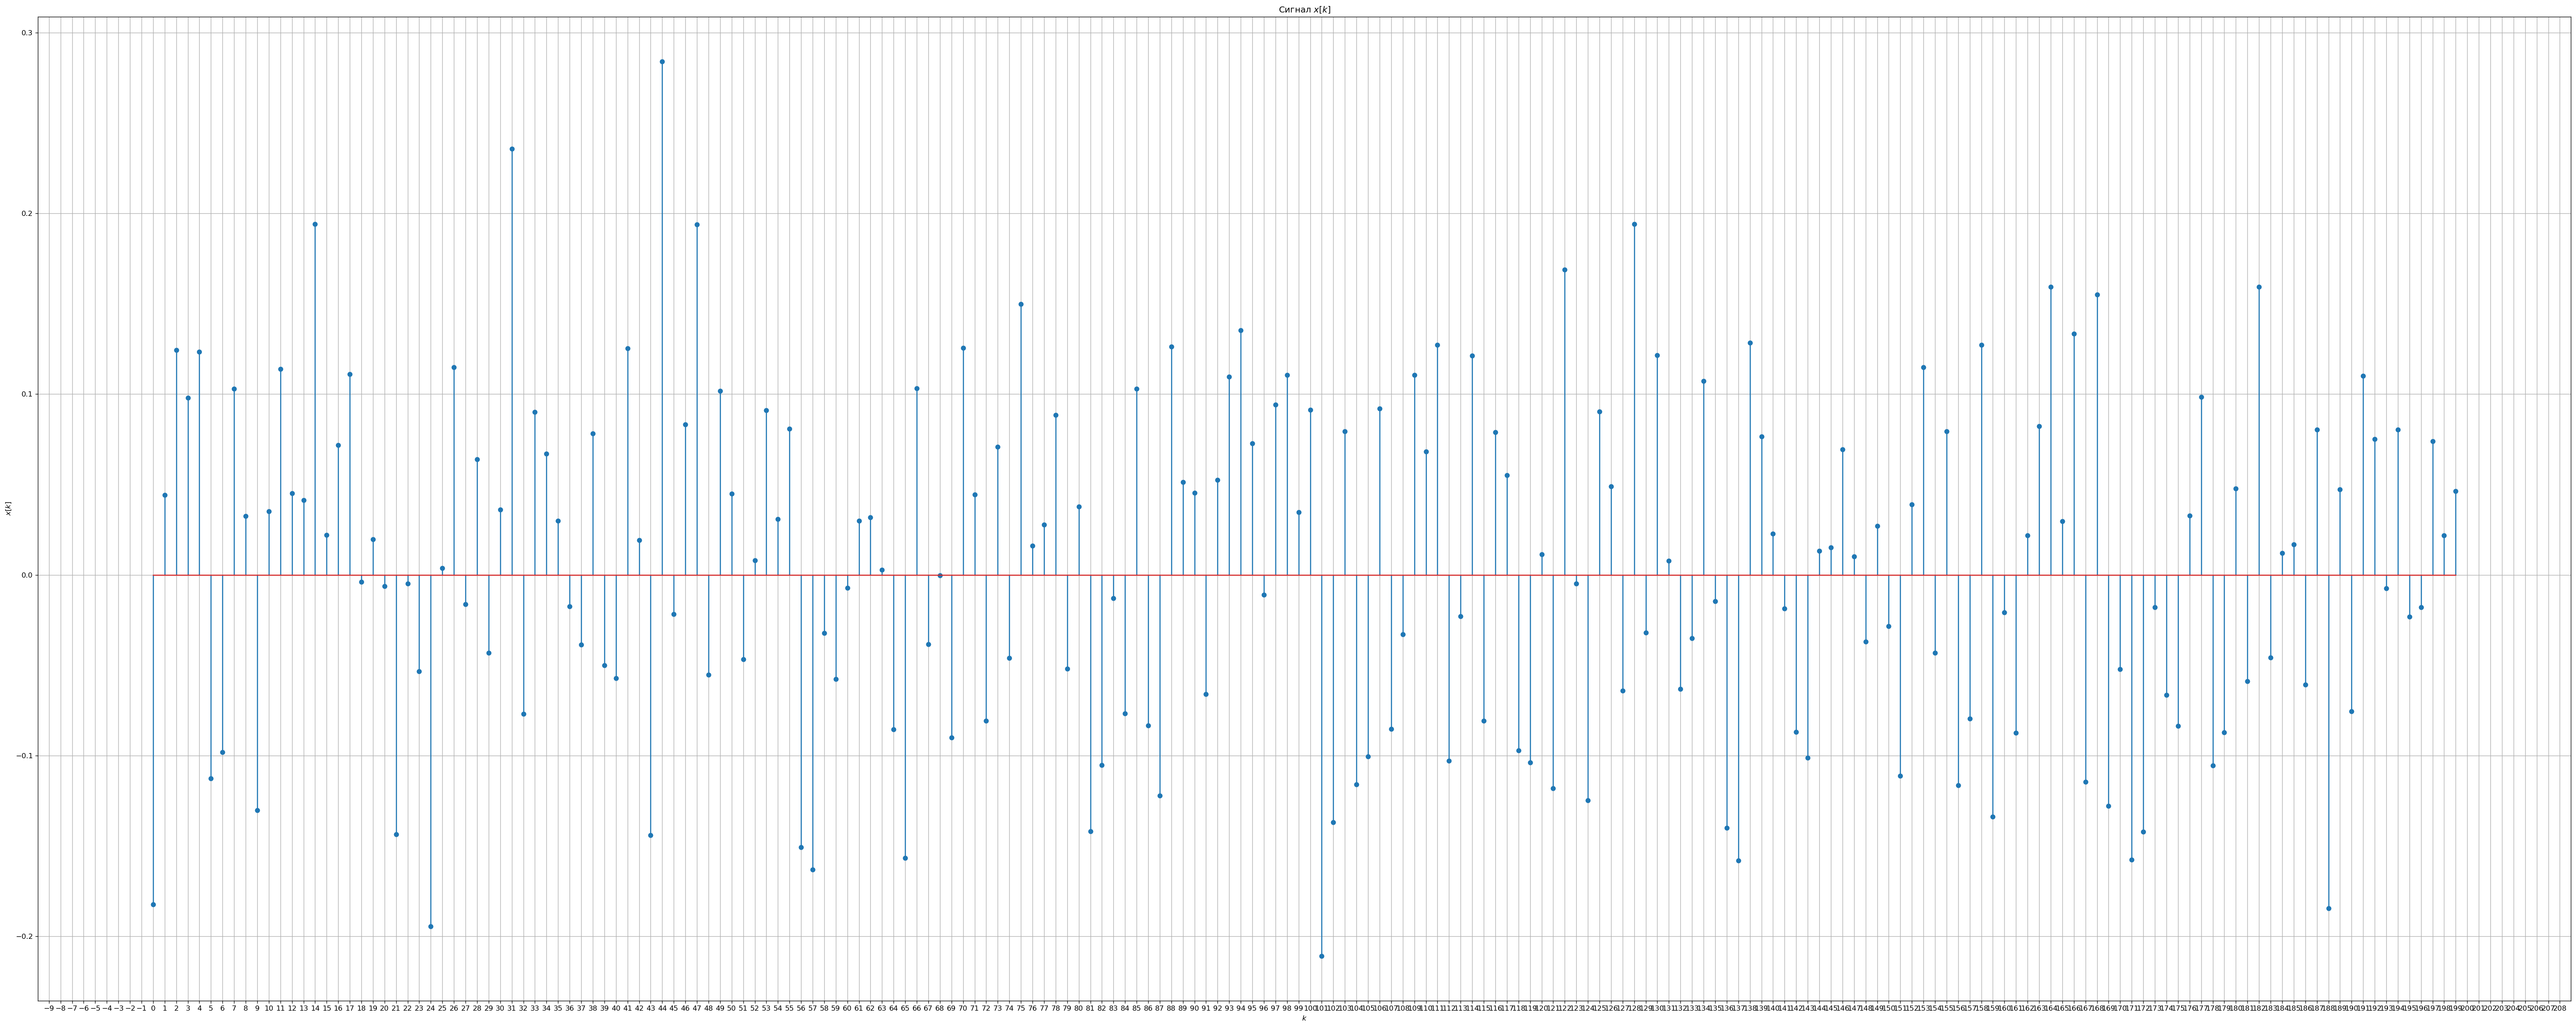

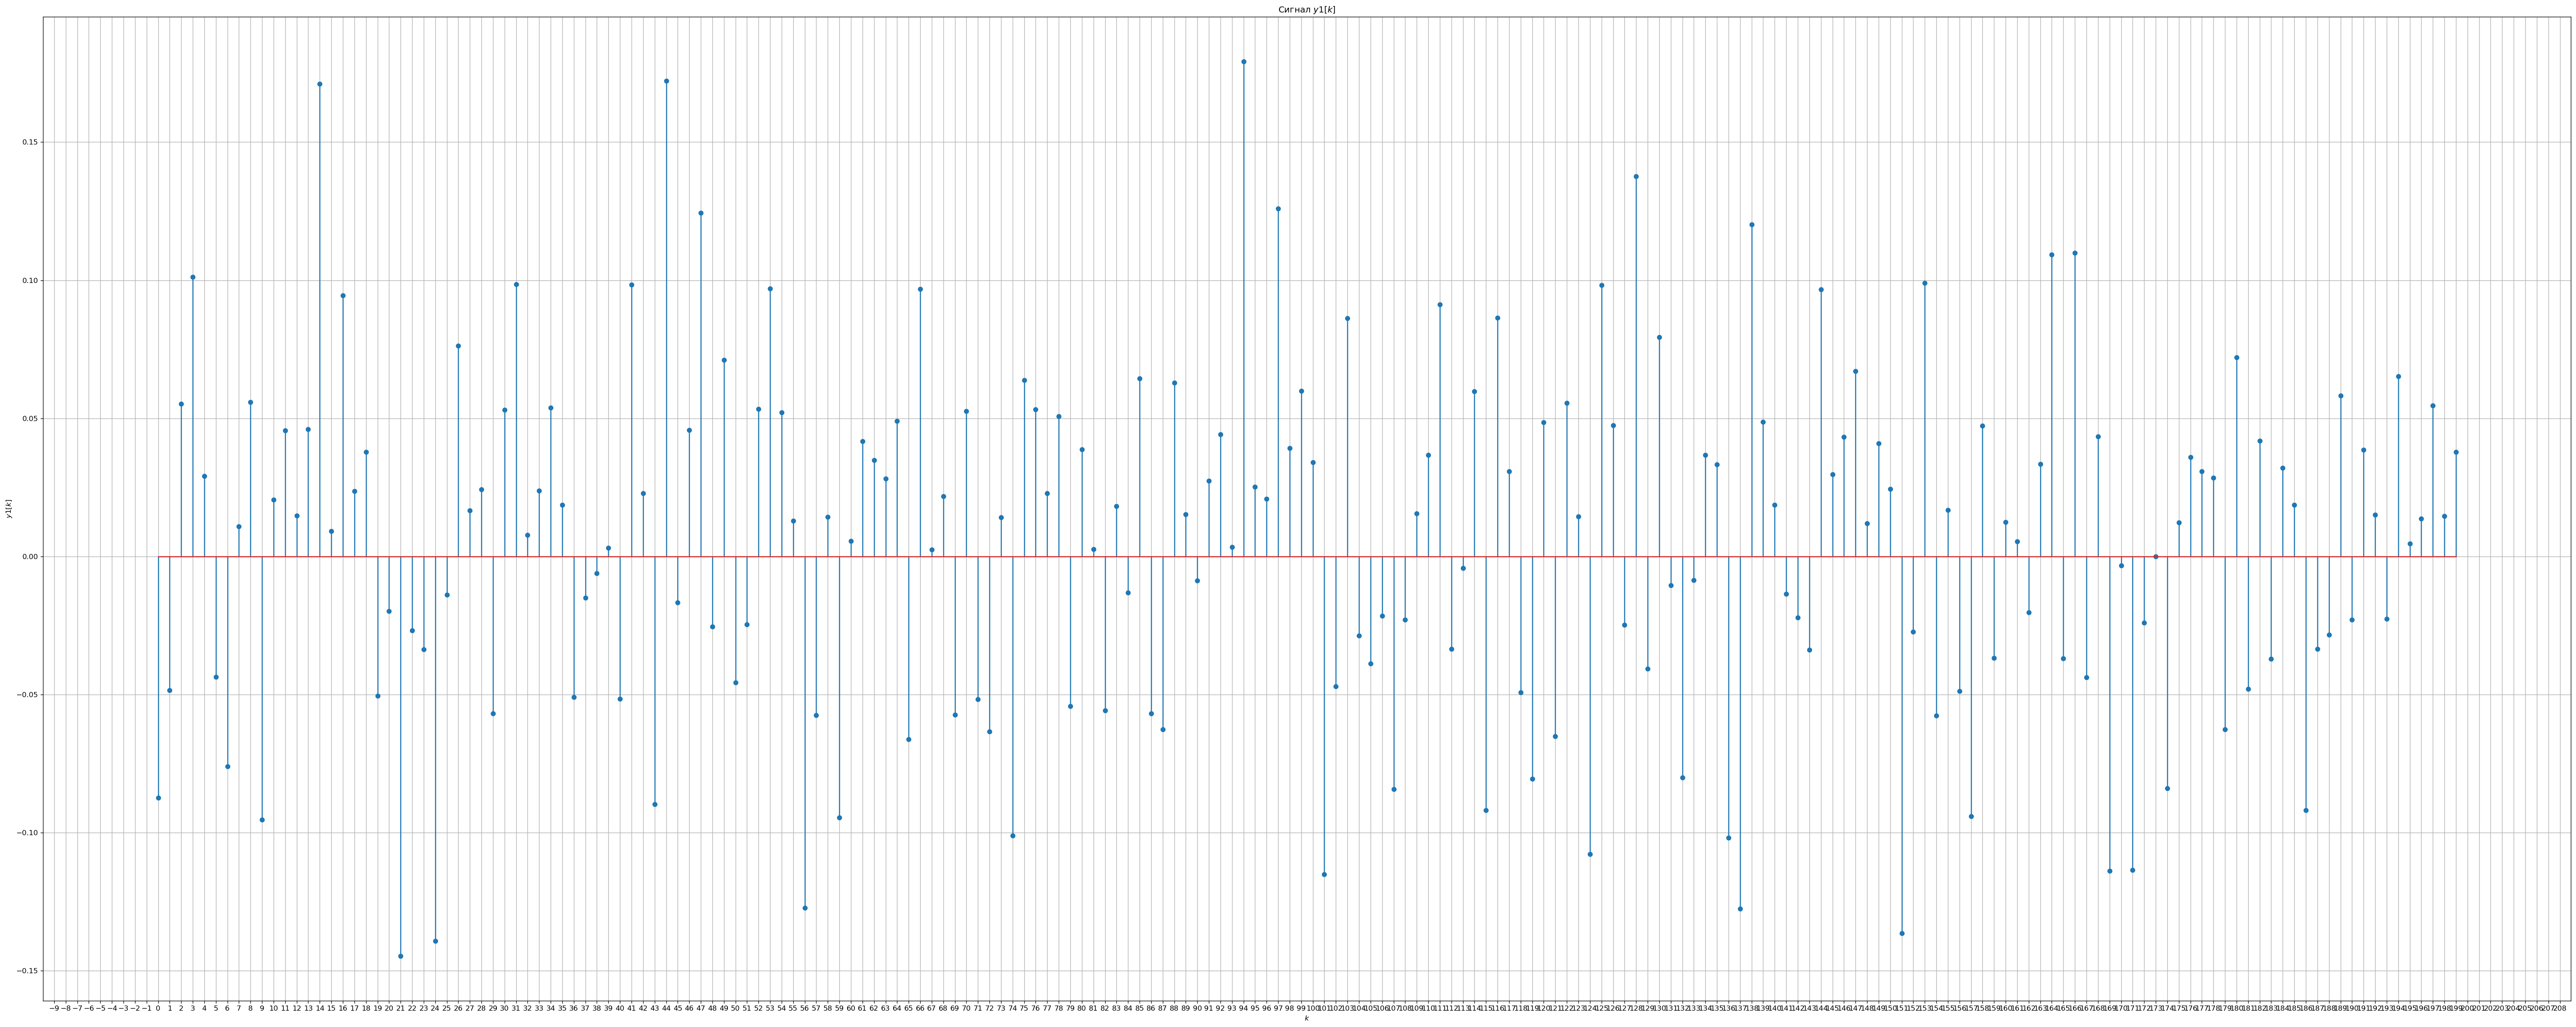

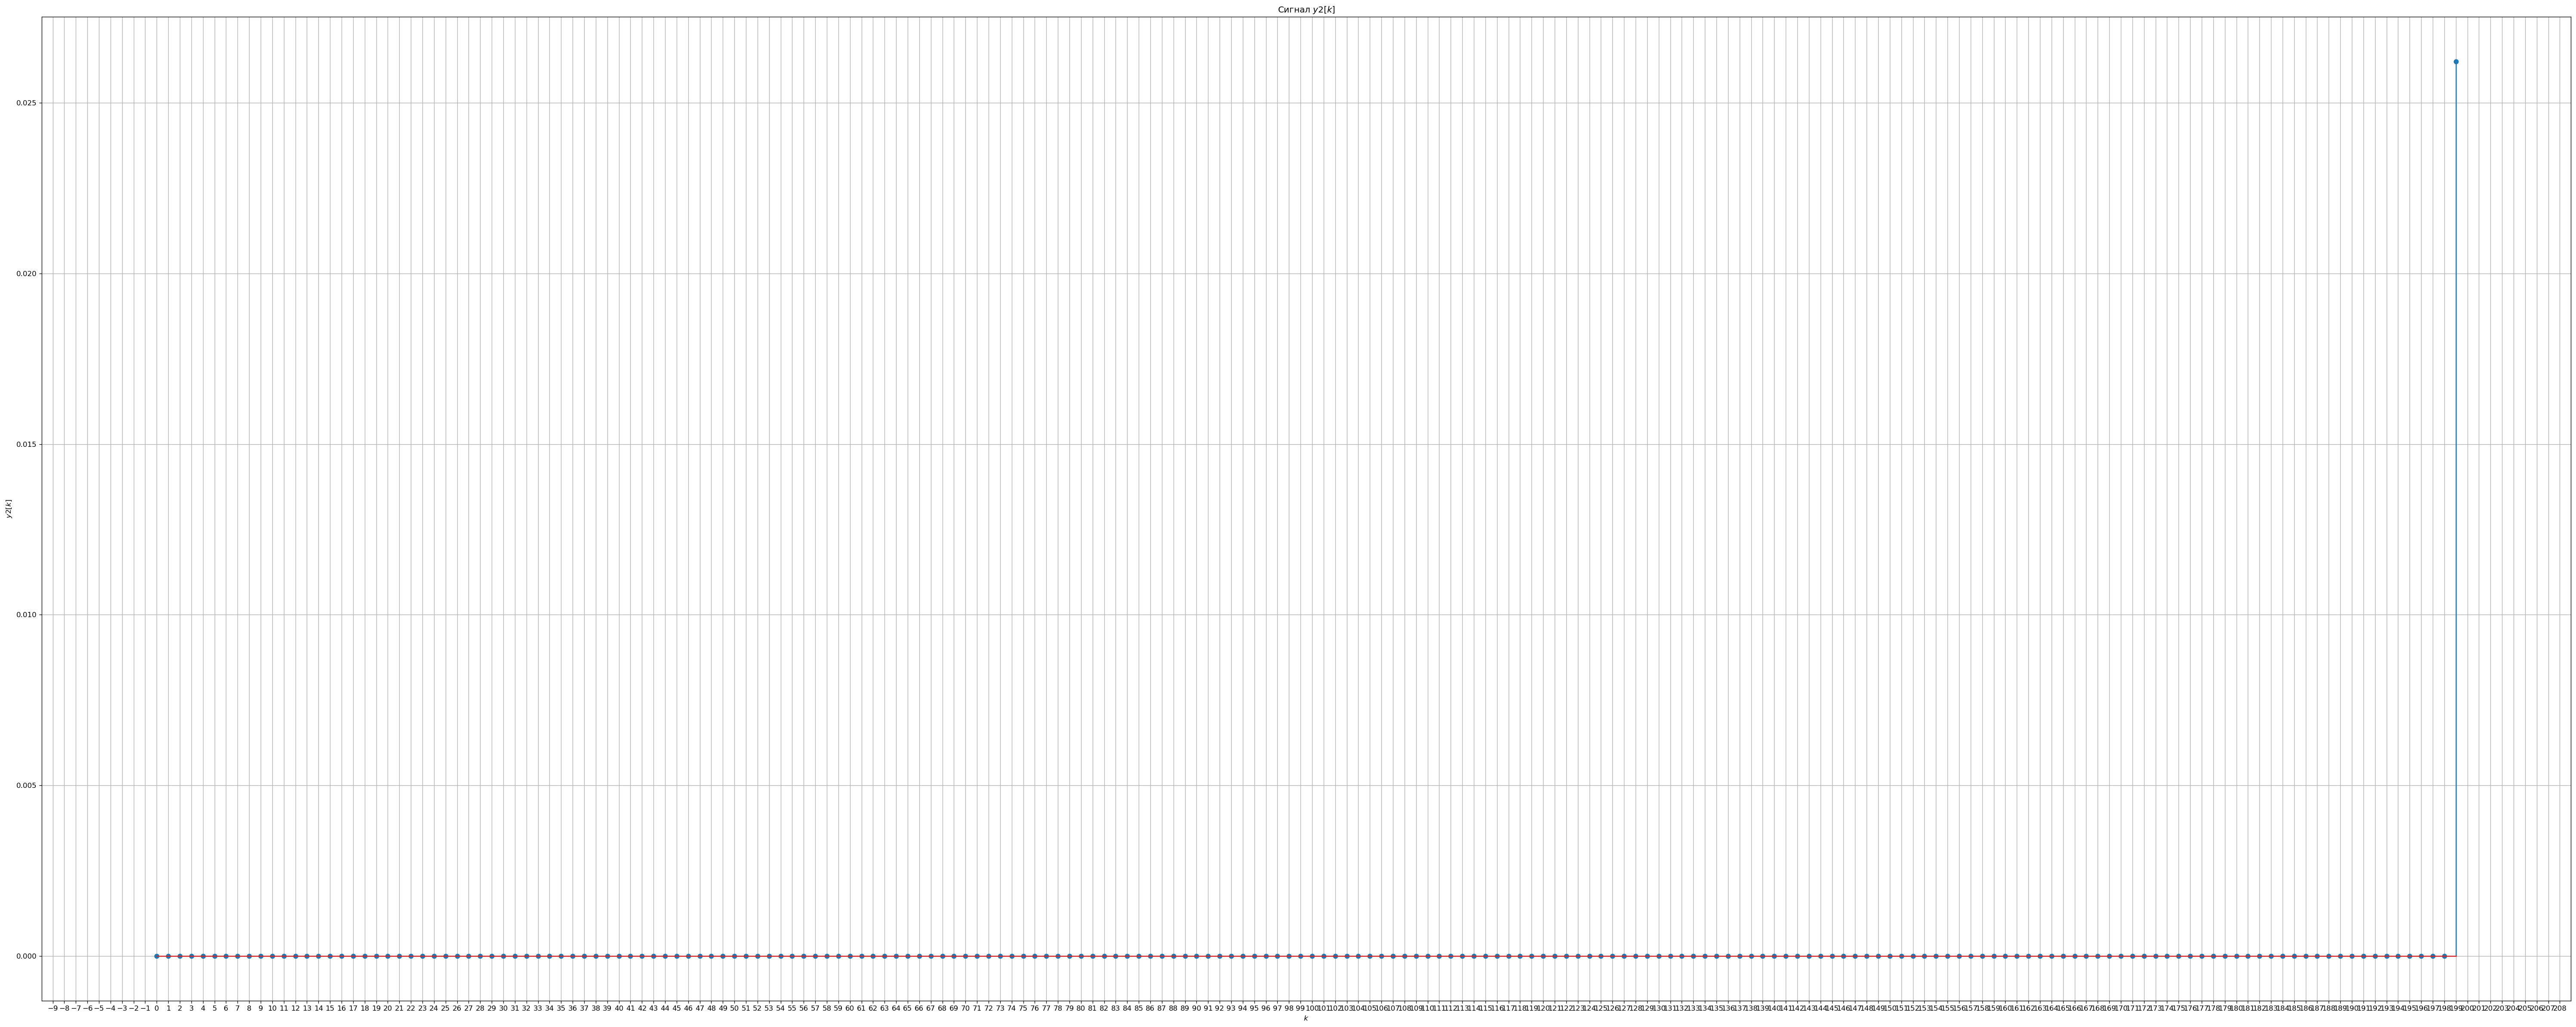

In [46]:

#Начало графического блока сигнала 
figure1 = plt.figure(figsize=[50, 20], dpi=120)# размер полотна,число точек на дюйм
ax = plt.axes() #создание объекта график
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))# шкала по абсцисс
plt.stem(k, x)# график отсчетов
plt.xlabel("$k$")# подпись оси абсцисс
plt.ylabel("$x[k]$")# подпись оси ординат
plt.title("Сигнал $x[k]$")# заголовок
plt.grid()# сетка
plt.tight_layout() #корректировка неперекрытия
plt.show() #показать график
#Конец графического блока сигнала 

#Начало графического блока сигнала 
figure1 = plt.figure(figsize=[50, 20], dpi=120)# размер полотна,число точек на дюйм
ax = plt.axes() #создание объекта график
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))# шкала по абсцисс
plt.stem(k_one, y_one)# график отсчетов
plt.xlabel("$k$")# подпись оси абсцисс
plt.ylabel("$y1[k]$")# подпись оси ординат
plt.title("Сигнал $y1[k]$")# заголовок
plt.grid()# сетка
plt.tight_layout() #корректировка неперекрытия
plt.show() #показать график
#Конец графического блока сигнала
 
#Начало графического блока сигнала 
figure1 = plt.figure(figsize=[50, 20], dpi=120)# размер полотна,число точек на дюйм
ax = plt.axes() #создание объекта график
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))# шкала по абсцисс
plt.stem(k_two, y_two)# график отсчетов
plt.xlabel("$k$")# подпись оси абсцисс
plt.ylabel("$y2[k]$")# подпись оси ординат
plt.title("Сигнал $y2[k]$")# заголовок
plt.grid()# сетка
plt.tight_layout() #корректировка неперекрытия
plt.show() #показать график
#Конец графического блока сигнала 

In [47]:
y_one = np.zeros(N)
y_two = np.zeros(N)

In [48]:
for j in range (0, N, 1):
    y_two[i] = (x[i] + x[i - 1]) / 2

for i in range (0, N, 1):
    y_one[i] = ((a * y_two[i] + b * y_two[i - M] + c * y_two[i - 2 * M]) / (a + b + c))



k_one = np.arange(y_one.size)
k_two = np.arange(y_two.size)

print("Выход первого фильтра = ", y_one)
print("k первого фильтра = ", k_one)
print("Выход второго фильтра = ", y_two)
print("k второго фильтра = ", k_two)

 

Выход первого фильтра =  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.01192751 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.      

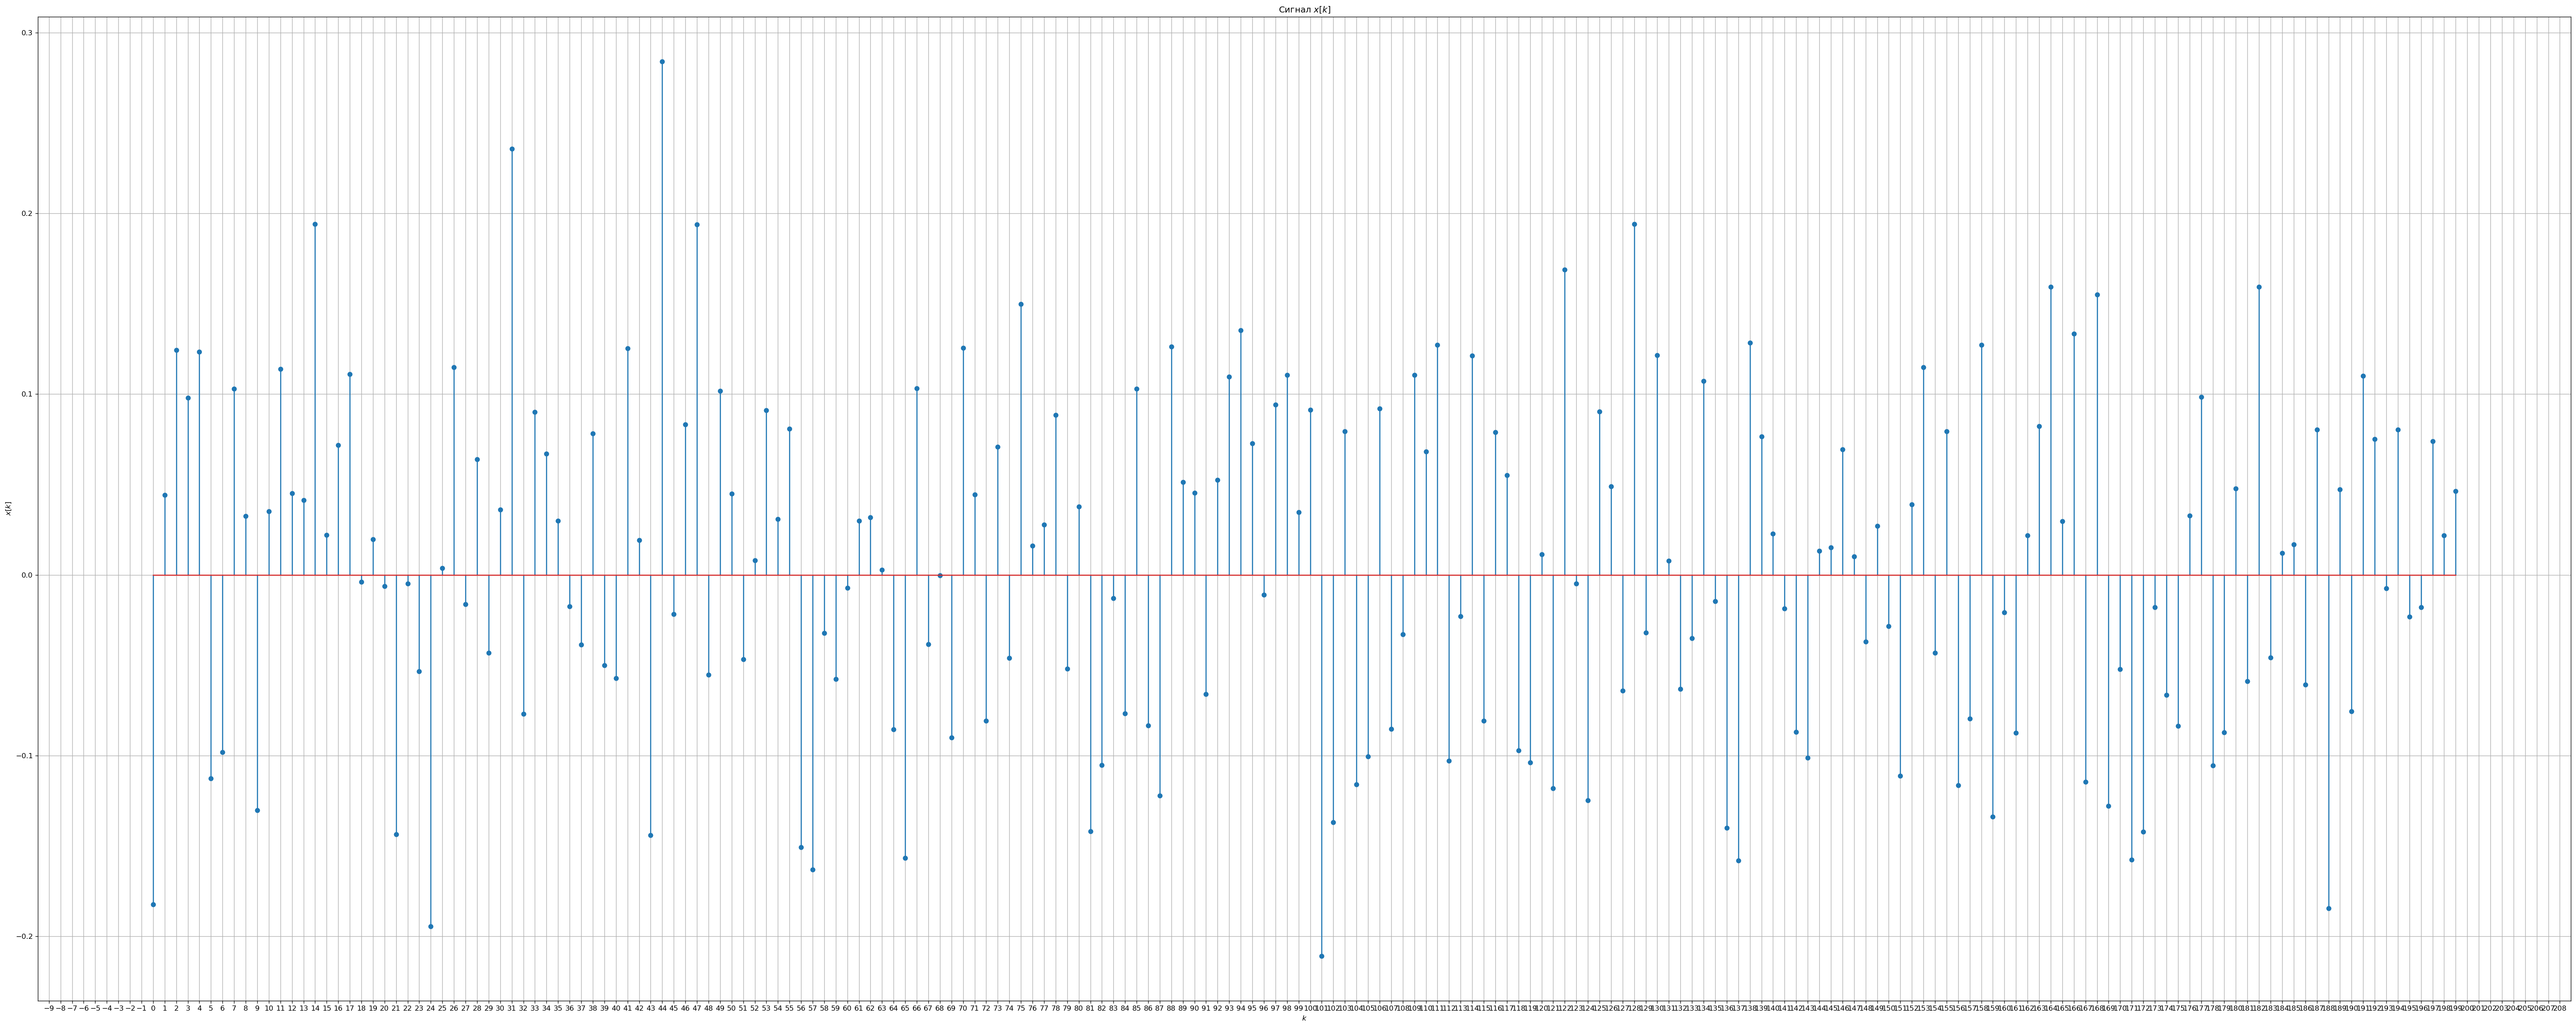

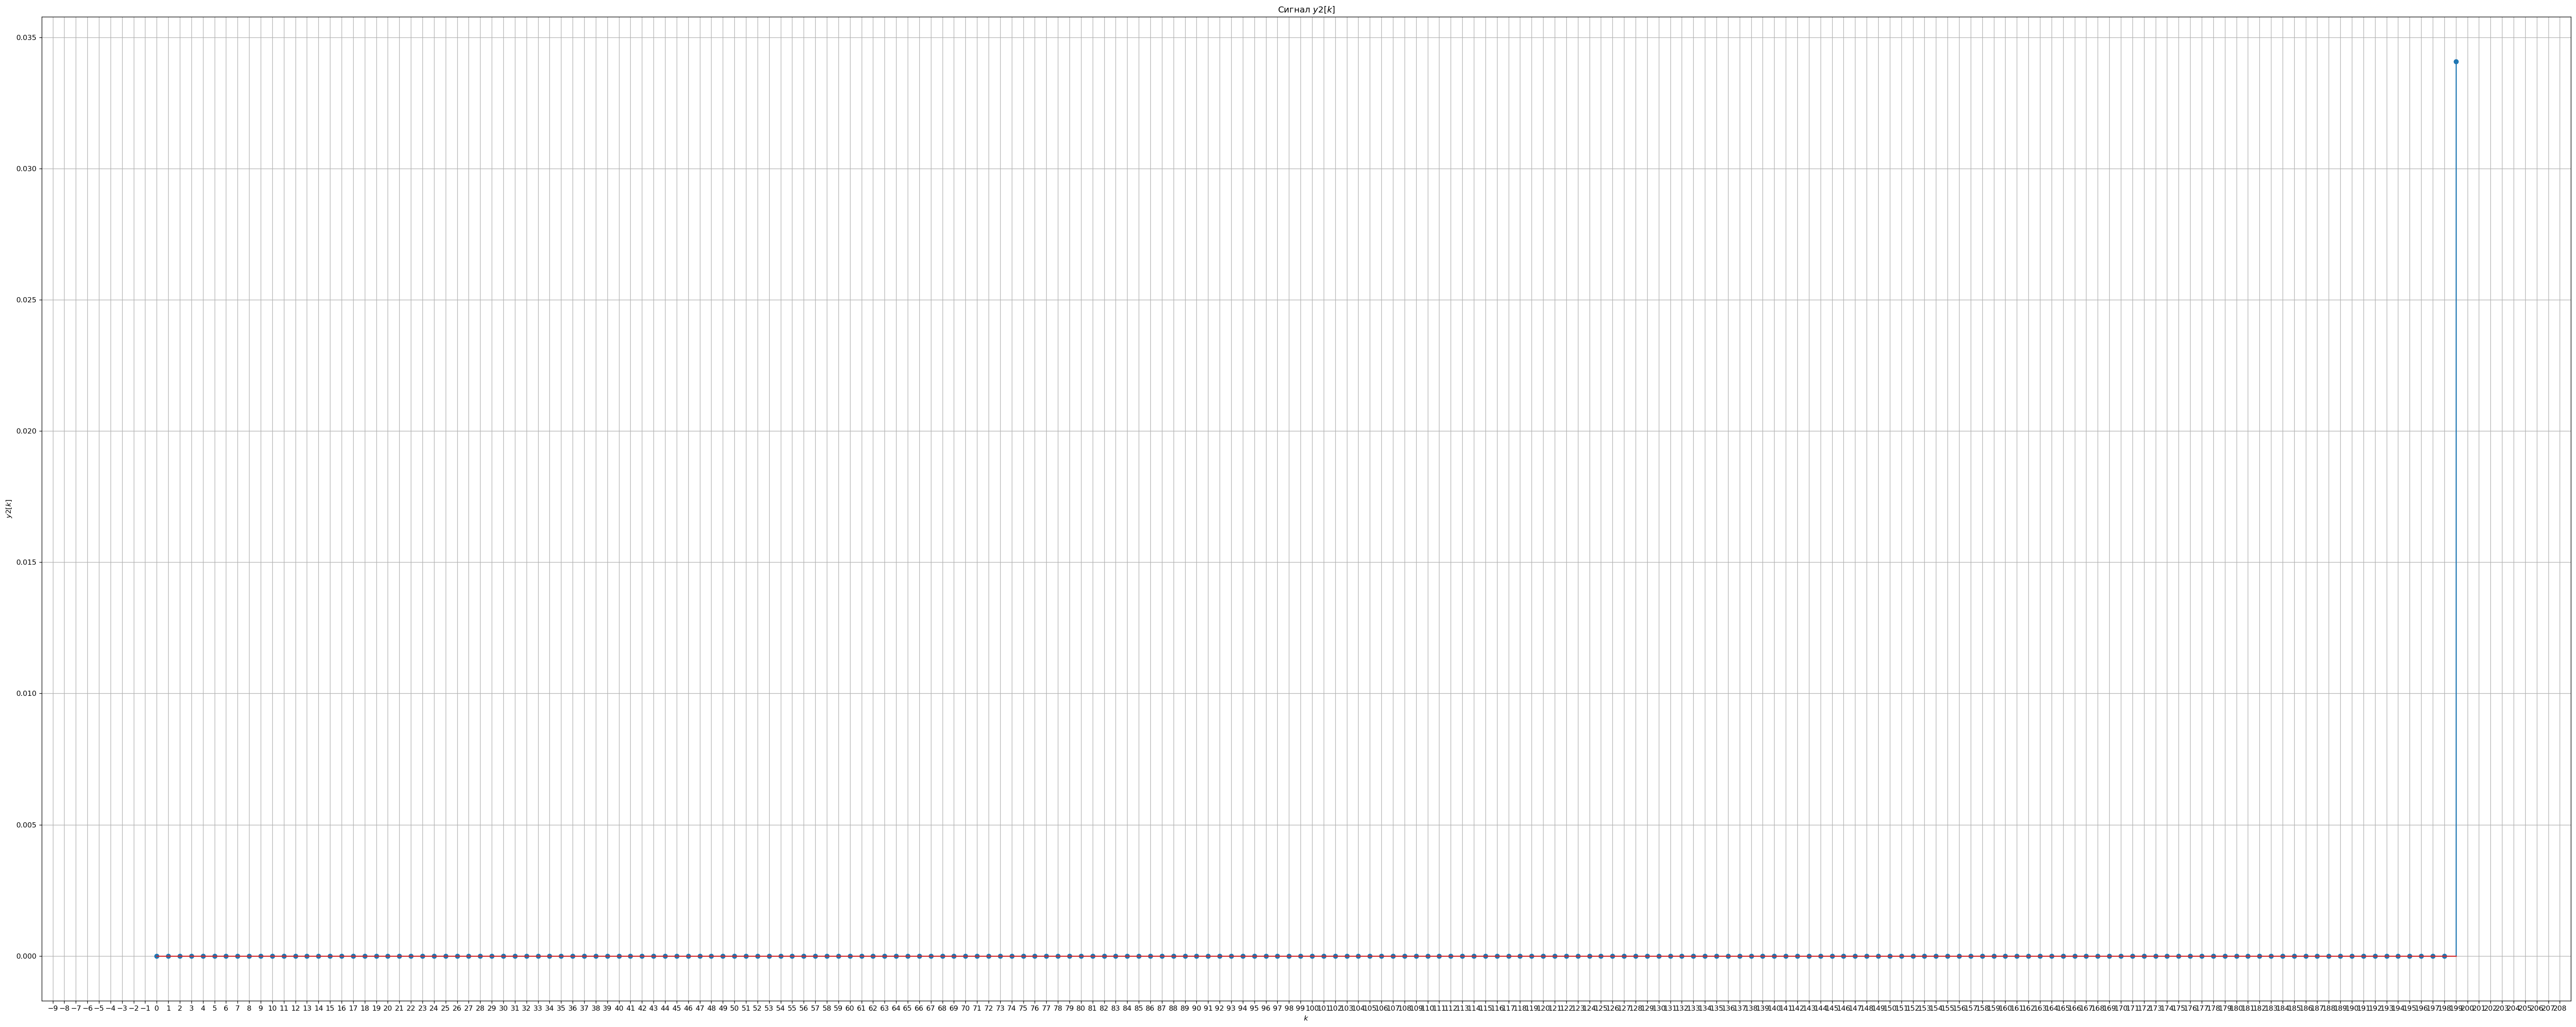

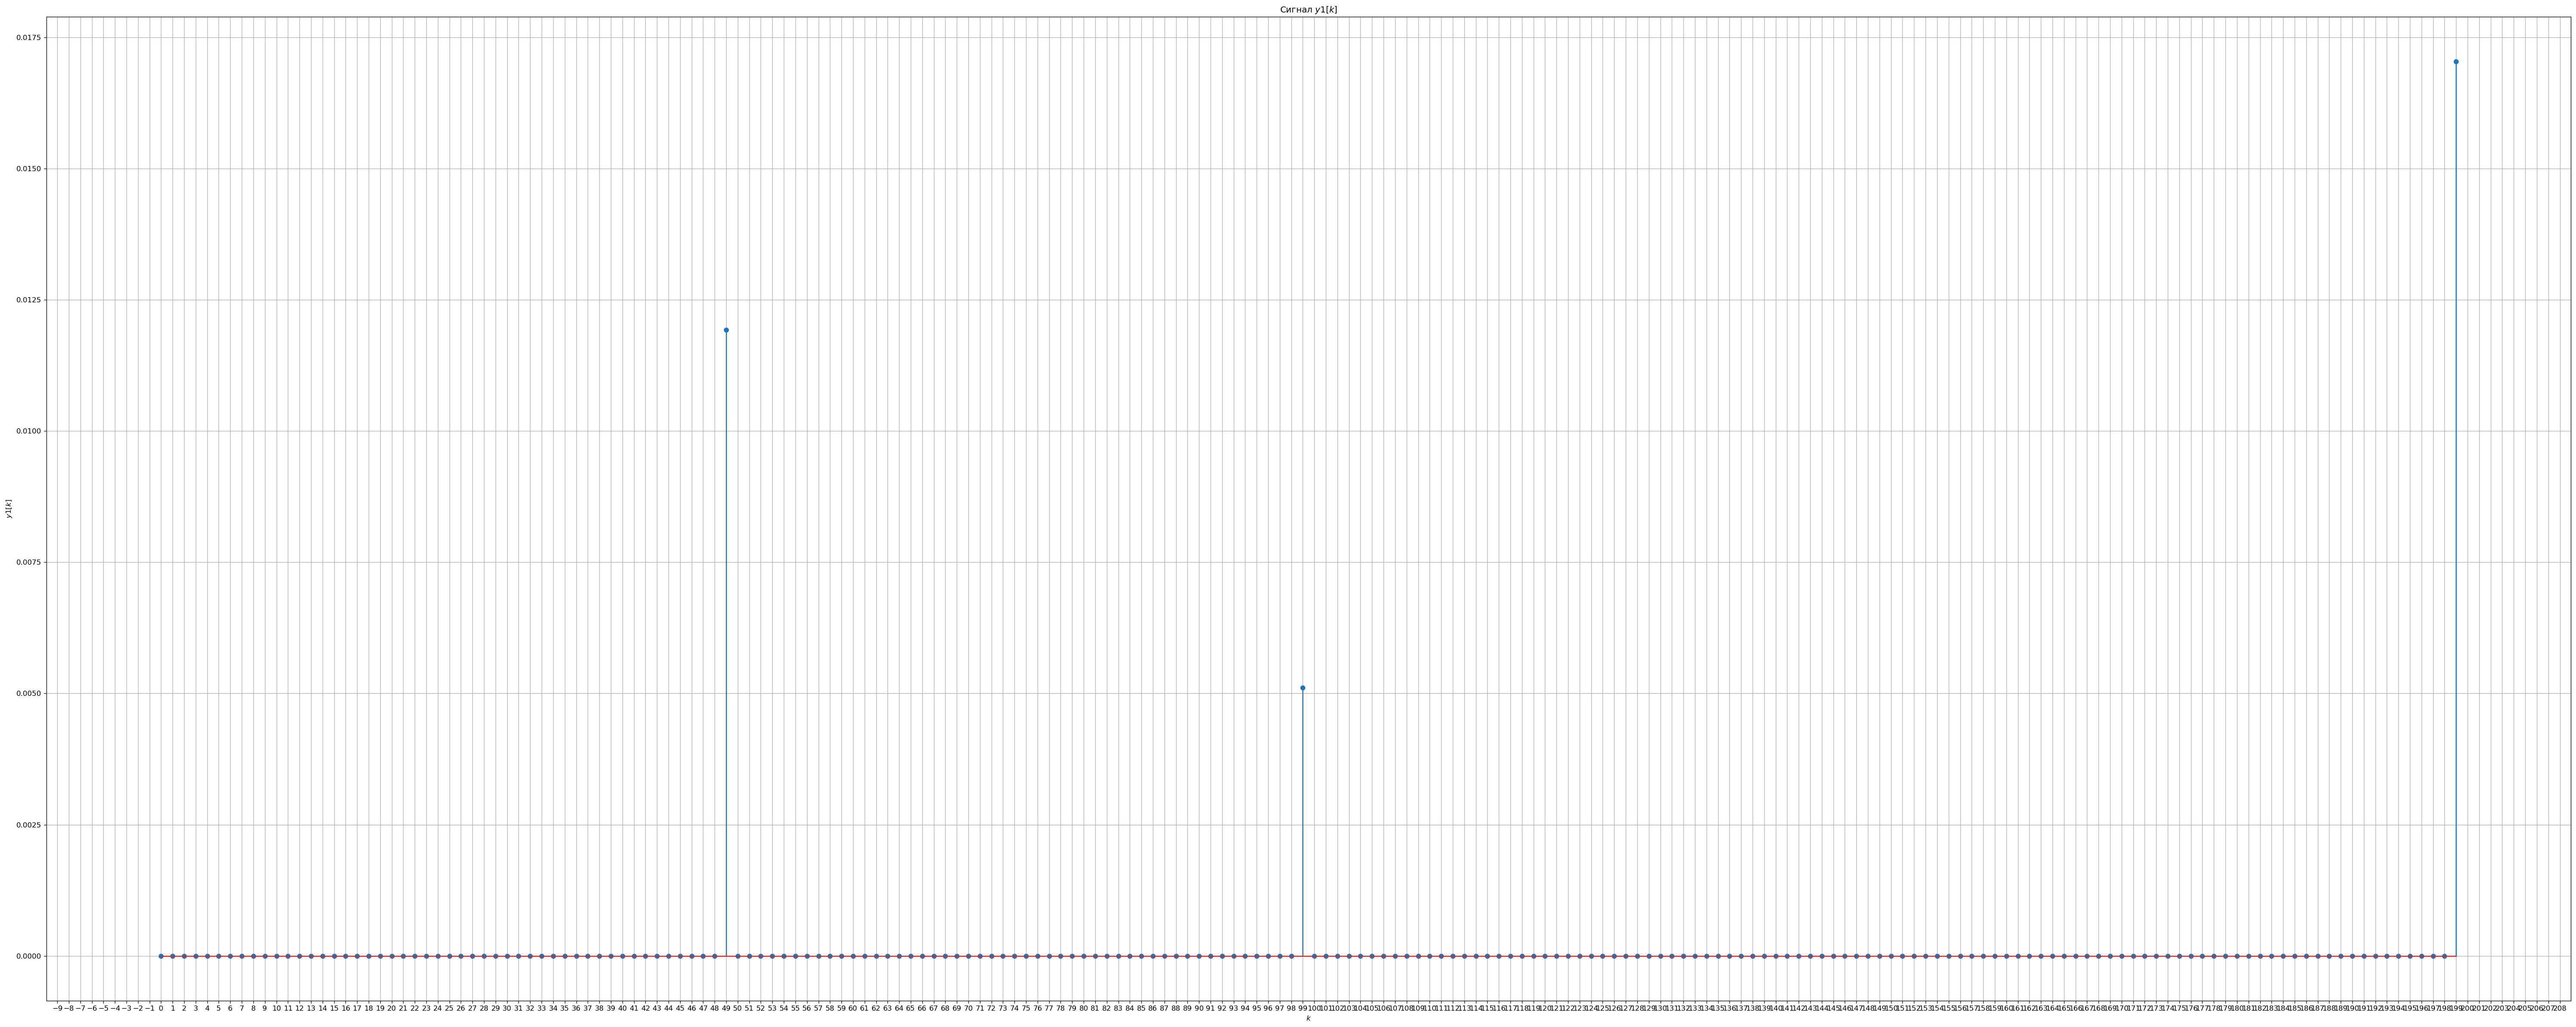

In [49]:

#Начало графического блока сигнала 
figure1 = plt.figure(figsize=[50, 20], dpi=120)# размер полотна,число точек на дюйм
ax = plt.axes() #создание объекта график
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))# шкала по абсцисс
plt.stem(k, x)# график отсчетов
plt.xlabel("$k$")# подпись оси абсцисс
plt.ylabel("$x[k]$")# подпись оси ординат
plt.title("Сигнал $x[k]$")# заголовок
plt.grid()# сетка
plt.tight_layout() #корректировка неперекрытия
plt.show() #показать график
#Конец графического блока сигнала 

#Начало графического блока сигнала 
figure1 = plt.figure(figsize=[50, 20], dpi=120)# размер полотна,число точек на дюйм
ax = plt.axes() #создание объекта график
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))# шкала по абсцисс
plt.stem(k_two, y_two)# график отсчетов
plt.xlabel("$k$")# подпись оси абсцисс
plt.ylabel("$y2[k]$")# подпись оси ординат
plt.title("Сигнал $y2[k]$")# заголовок
plt.grid()# сетка
plt.tight_layout() #корректировка неперекрытия
plt.show() #показать график
#Конец графического блока сигнала
 
#Начало графического блока сигнала 
figure1 = plt.figure(figsize=[50, 20], dpi=120)# размер полотна,число точек на дюйм
ax = plt.axes() #создание объекта график
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))# шкала по абсцисс
plt.stem(k_one, y_one)# график отсчетов
plt.xlabel("$k$")# подпись оси абсцисс
plt.ylabel("$y1[k]$")# подпись оси ординат
plt.title("Сигнал $y1[k]$")# заголовок
plt.grid()# сетка
plt.tight_layout() #корректировка неперекрытия
plt.show() #показать график
#Конец графического блока сигнала 

In [50]:
print("А вскоре,небо населяли птицы.", "И был вечер.", "И было утро.", sep = '\n')

А вскоре,небо населяли птицы.
И был вечер.
И было утро.


# Модуль 3. Аппроксимация идеальных частотно-избирательных фильтров и явление Гиббса

## Задача 3.1. Явление Гиббса для каузальной аппроксимации ИФНЧ

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |   7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $\nu_c$  |0.1 |0.2 |0.3 |0.1 |0.2 |0.3 |0.2 |0.3 |0.1 | 0.2 |
|    $N$    | 30 | 20 | 30 | 20 | 30 | 20 | 24 | 22 | 26 | 28 |

Рассмотрите фильтр с импульсной характеристикой
$$
h[k] =
\left\{\begin{array}{l}
\dfrac{\sin(2\pi\nu_c (k-N))}{\pi (k-N)}, 0\le k \le 2N-1
\\
0, \; \text{при других } k.
\end{array}\right.
$$
для случая $\nu_c,\; N$ из варианта. 

Вычислите с помощью моделирования и постройте график АЧХ этого фильтра.  
Как изменяется АЧХ с ростом $N$ при фиксированной частоте среза $\nu_c$?

## Задача 3.2.  Аппроксимация фильтра с заданной частотной характеристикой с помощью ДВПФ   

Определить импульсную характеристику $h_{ideal}[k]$ фильтра, частотная характеристика которого является действительной функцией частоты и представлена на рисунке. 

Рассмотреть фильтр, импульсная характеристика которого в отличии от $h_{ideal}[k]$  усечена до $2N$ отсчетов и сдвинута на $N$ отсчетов вправо. С помощью моделирования определить и построить график АЧХ. Сравнить АЧХ обоих фильтров.

Рисунок генерируется с помощью функции `task_3_2(variant)` (приведенной ниже), где `variant` – номер варианта. 

In [51]:
import numpy as np
import matplotlib.pyplot as plt 
def task_3_2(variant):
    nu_c1 = [0.2, 0.15, 0.15, 0.1, 0.15, 0.15, 0.2, 0.15, 0.15, 0.1]
    amp1 = [1,  0, 0.2, 1, 1, 0.6, 0.3, 0.2, 1, 1]
    nu_c2 = [0.4, 0.35, 0.4,  0.3,  0.35,  0.4, 0.4,  0.3,  0.35,  0.4]
    amp2 = [0.4, 1, 1, 0.4, 0.7,  1, 1, 1, 0.4, 0.7]
    def H_val(nu, n):
        return amp1[n] if abs(nu)<=nu_c1[n] else amp2[n] if abs(nu)<=nu_c2[n] else 0.0
    nu=np.arange(-0.5, 0.5, 0.001)
    plt.figure(figsize=[6, 2], dpi=140)
    plt.plot(nu, [H_val(x, variant-1) for x in nu] ,'g-')
    plt.xticks([-0.5, -nu_c2[variant-1], -nu_c1[variant-1], 0, nu_c1[variant-1], nu_c2[variant-1], 0.5])
    plt.grid()
    plt.yticks([0, min(amp1[variant-1],amp2[variant-1]), 1])
    plt.xlim([-0.5, 0.5])
    plt.xlabel("Нормированнная частота, $\\nu$")
    plt.ylabel("$H(\\nu)$")
    plt.title("Вариант %i" %variant)
    plt.tight_layout()
    plt.show()

Пример вывода задания для первого варианта.

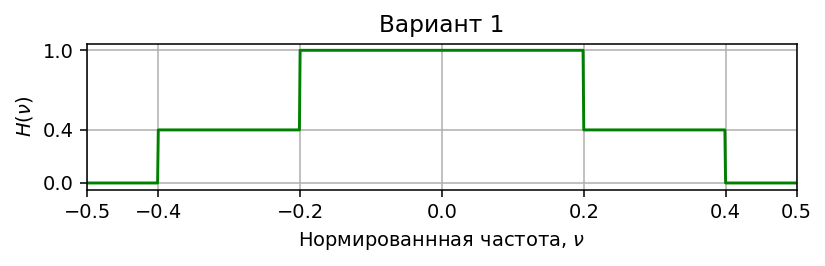

In [52]:
task_3_2(variant=1)